In [2]:
"""Jupyter Notebook for relaxation time analysis"""
#The main analysis parts adapted from script by  H. Antila, with help from S. Ollila and T. Ferreira
#saved in relaxation_times.py
# Last modified by R. Nencini, 19.10.2021
import yaml
import sys
import numpy as np
from scipy import optimize
sys.path.insert(1, '/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/')
sys.path.insert(1, '/home/nenciric/Documents/git/NMR_FF_tools/relaxation_times/')

import relaxation_times as rt
import manage_files as mf
import plotting as pt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


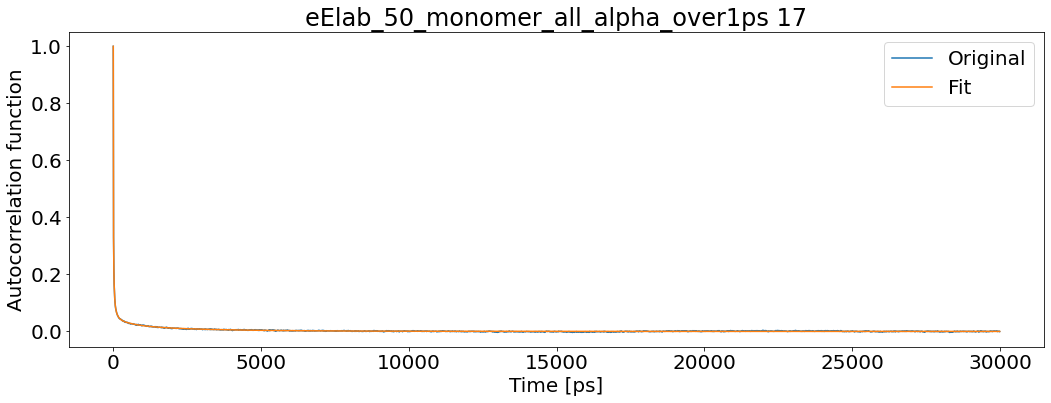

T1: 5.472173644353001 T2: 2.9303553662307924 NOE: -1.2874877210613835


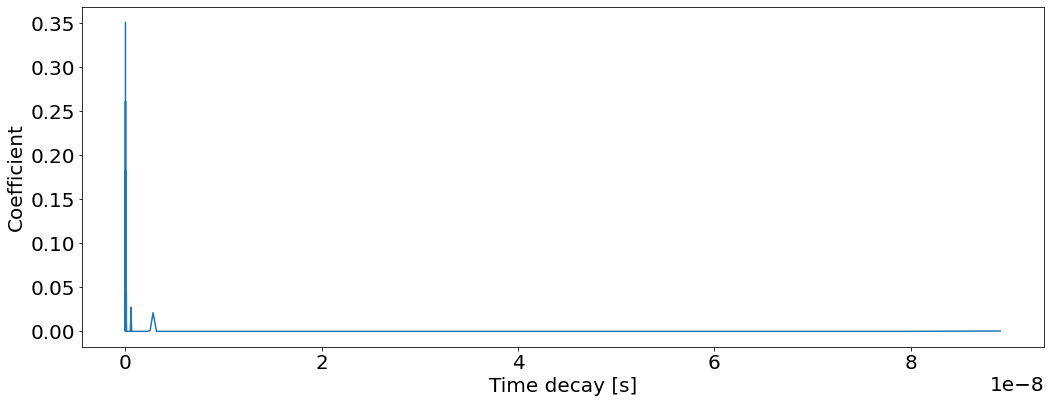

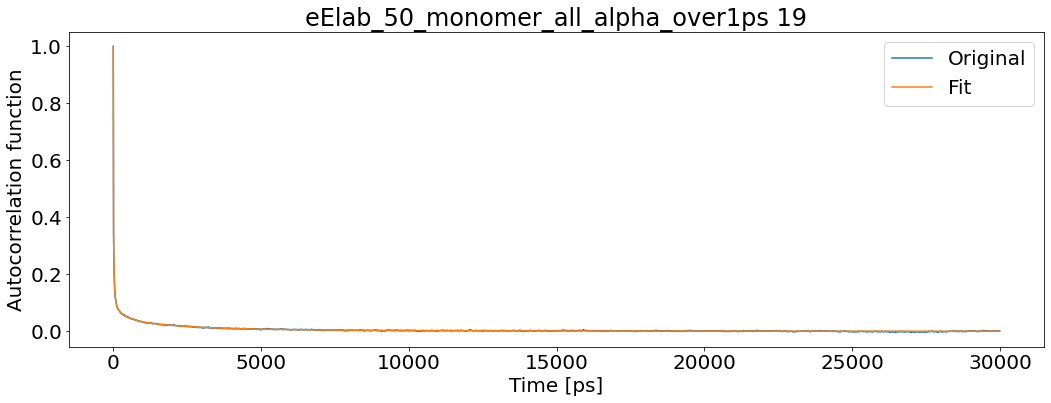

T1: 4.127611263696372 T2: 2.2504095877831243 NOE: -0.9303127218693077


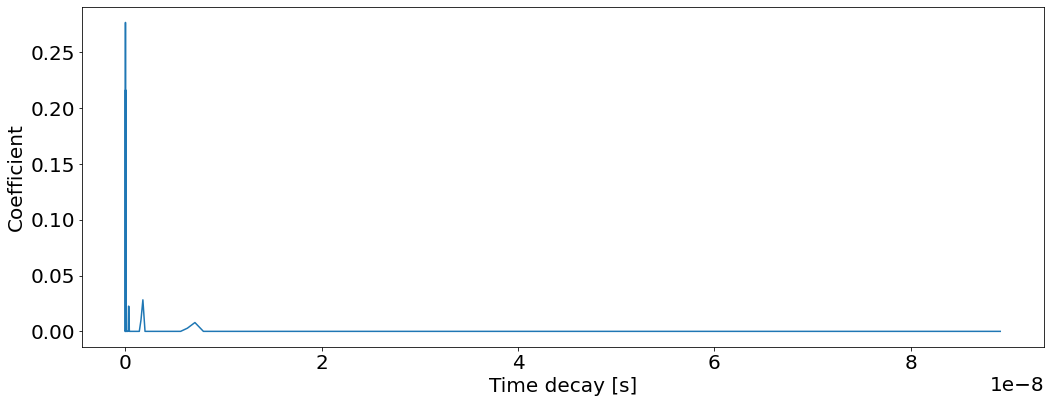

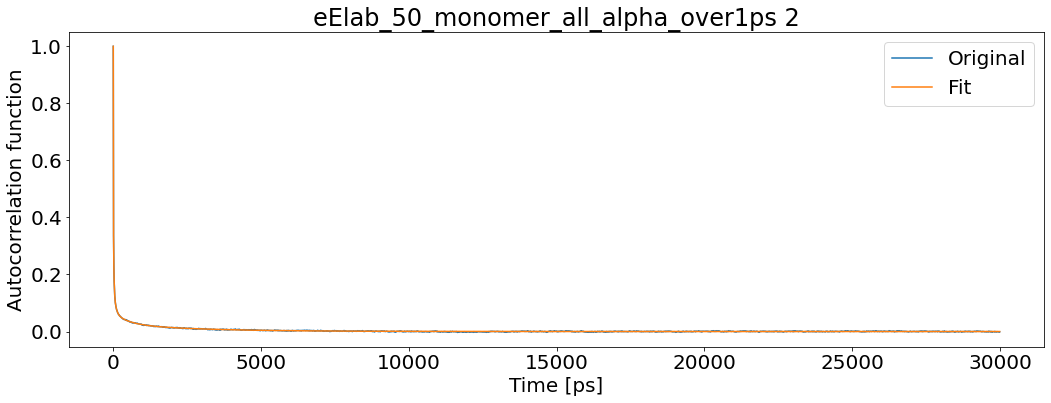

T1: 4.799233330231001 T2: 3.138769815637654 NOE: -1.1517427177095856


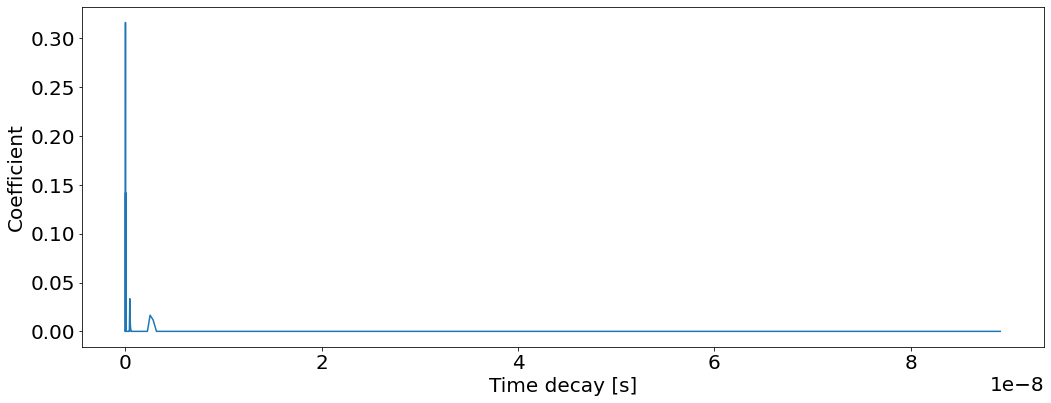

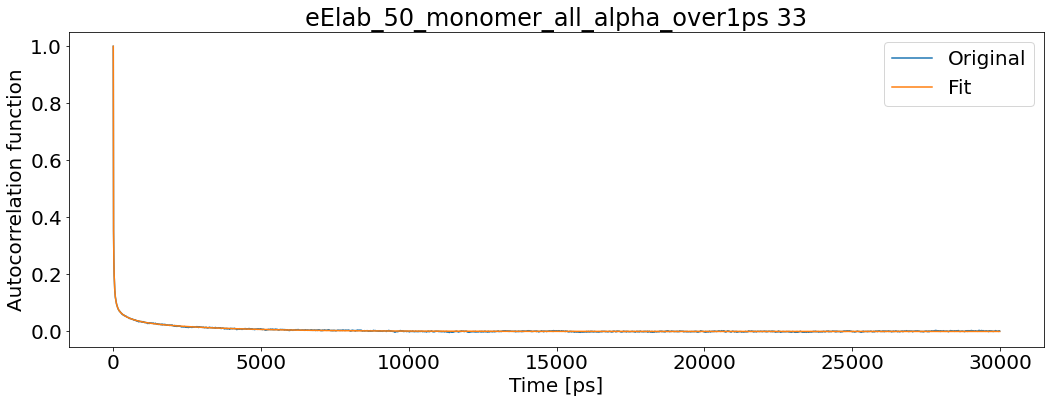

T1: 4.139784363041547 T2: 2.4207485157647914 NOE: -0.9505102435814119


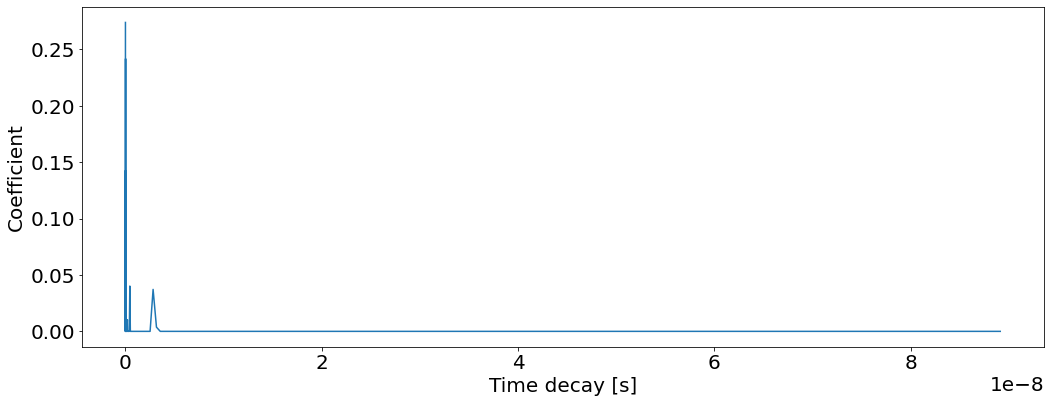

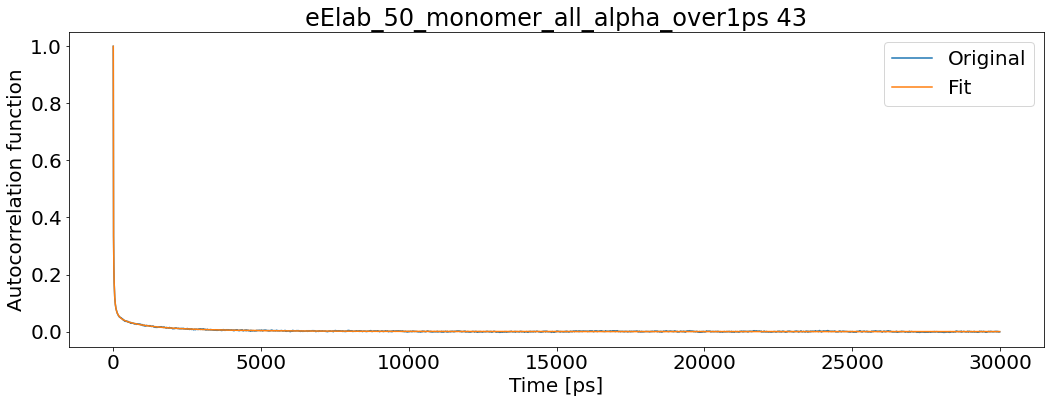

T1: 4.930380726011722 T2: 3.330413890692604 NOE: -1.161573519547472


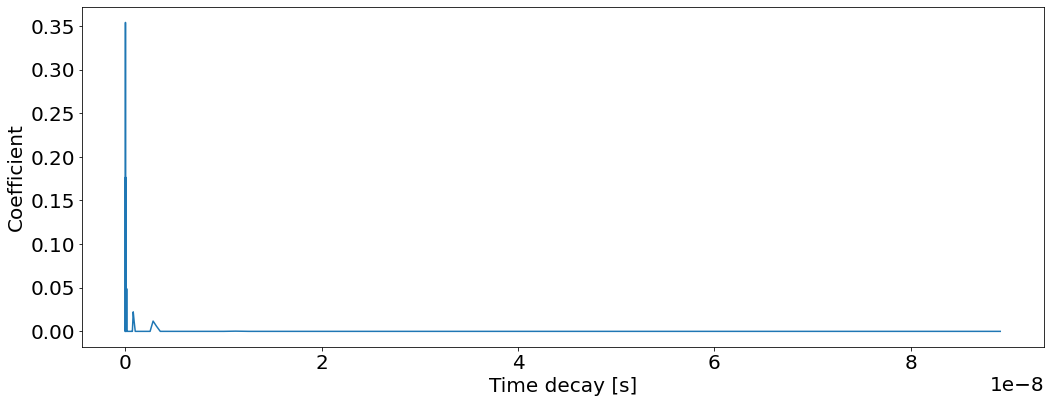

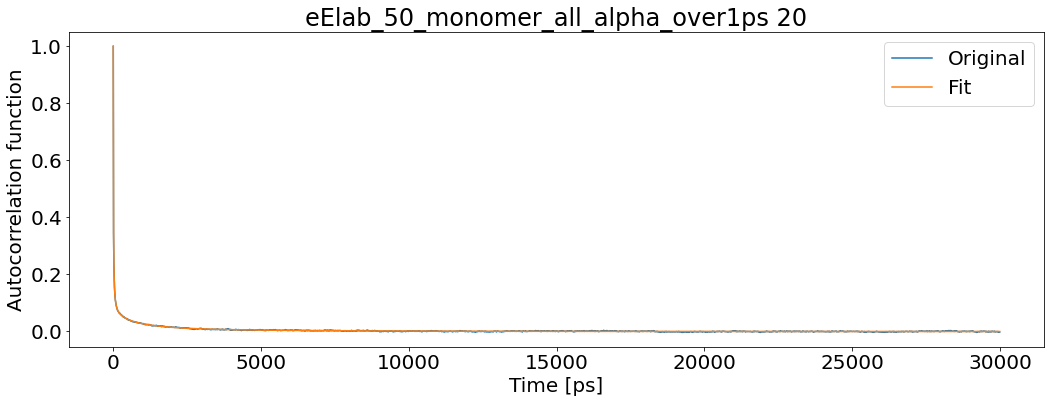

T1: 4.395459481312388 T2: 2.7720584701248074 NOE: -1.0525481176294709


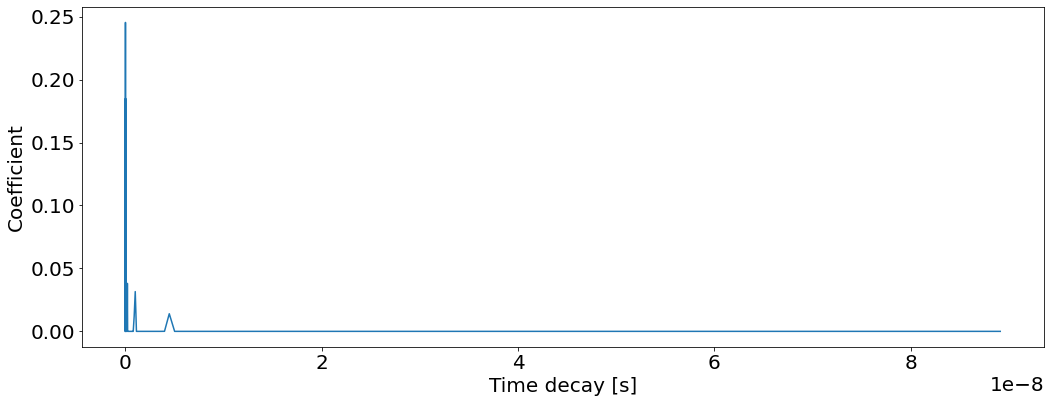

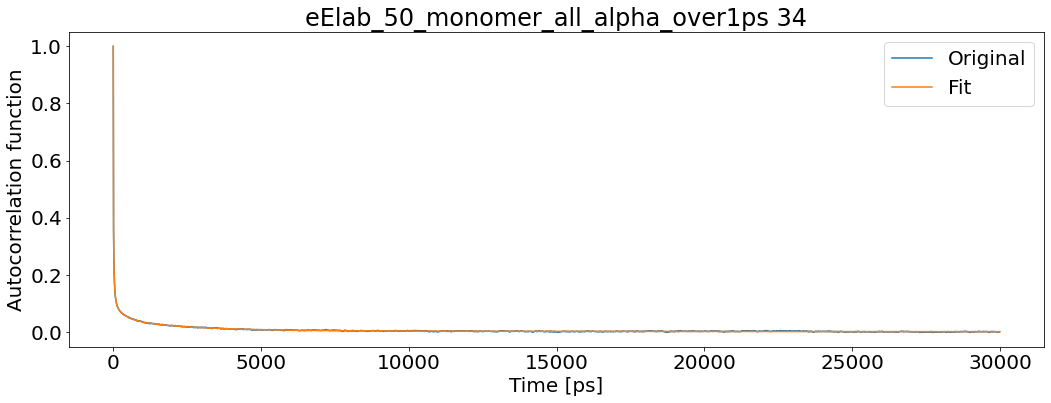

T1: 3.9515714453235686 T2: 1.8308552823905329 NOE: -0.9022105943533514


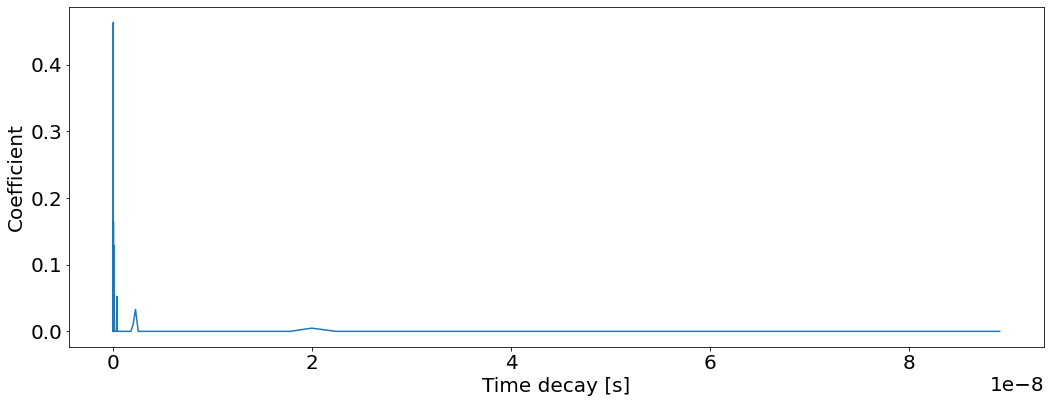

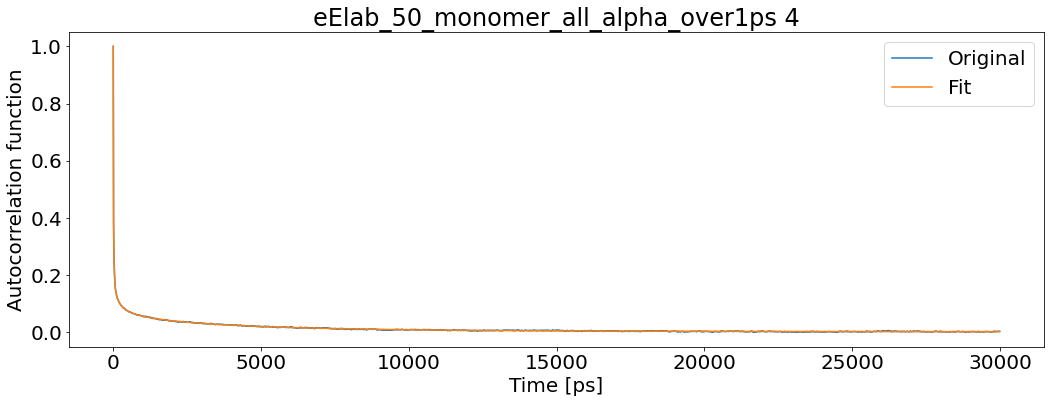

T1: 3.513416998360975 T2: 0.9079208316237227 NOE: -0.777777299755608


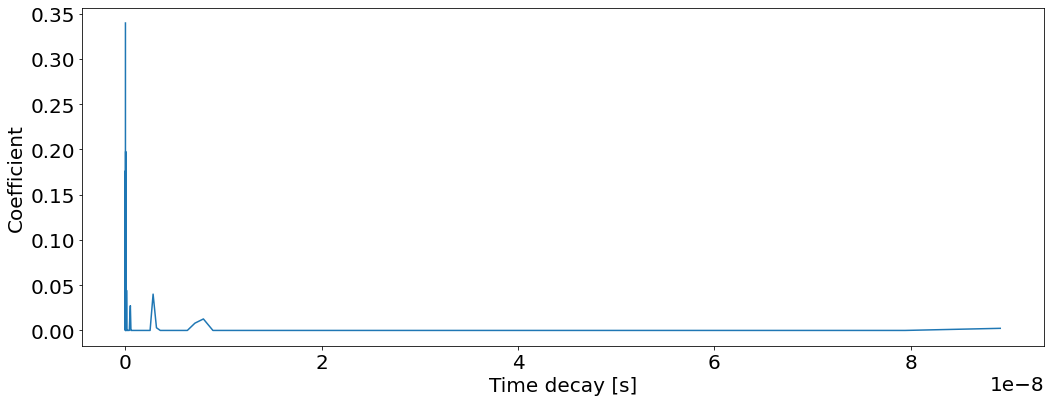

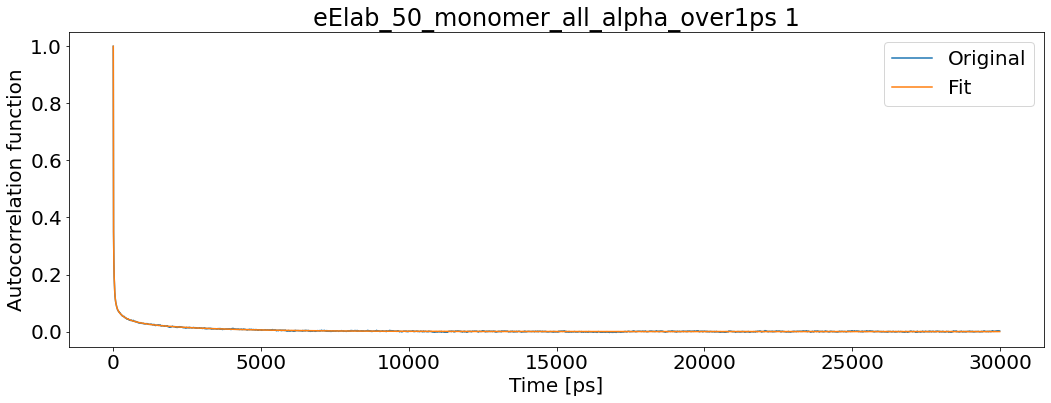

T1: 4.3577610601120655 T2: 2.4488025327636223 NOE: -1.0238481862380167


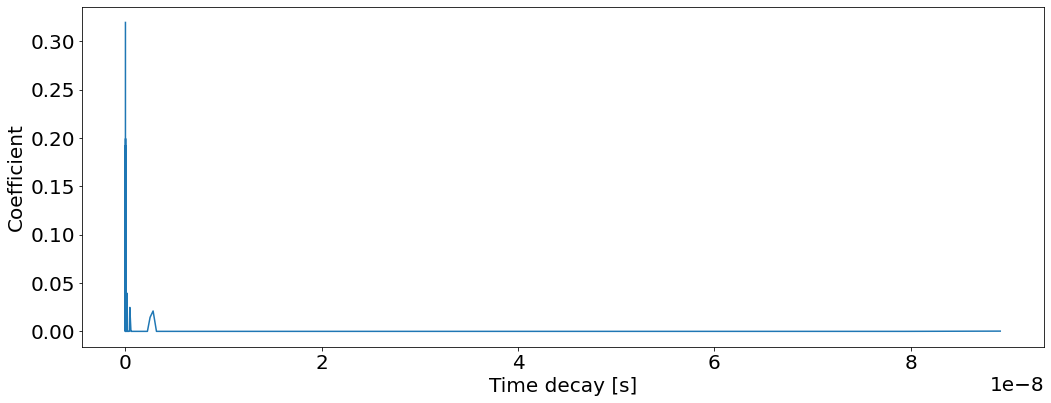

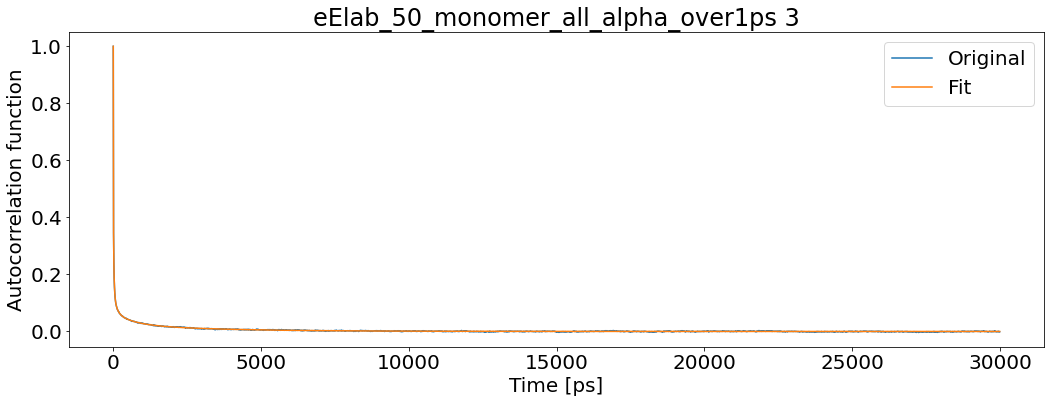

T1: 4.514793298169716 T2: 2.79261038329359 NOE: -1.051696953739238


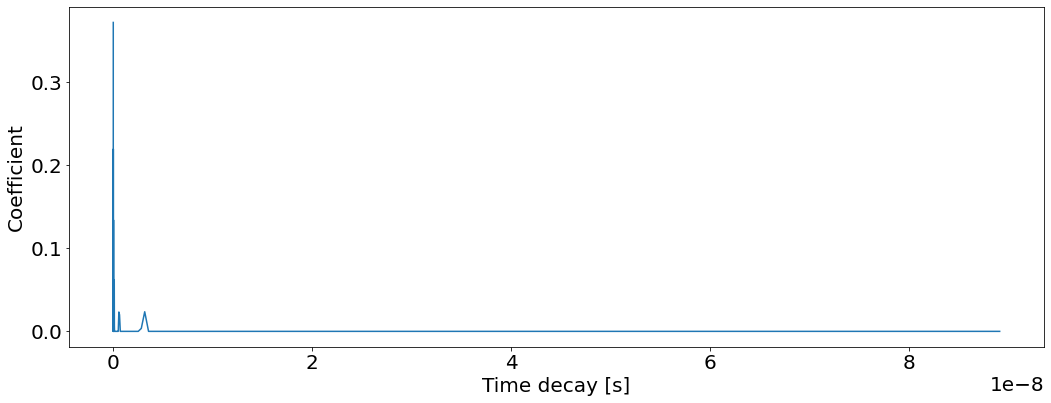

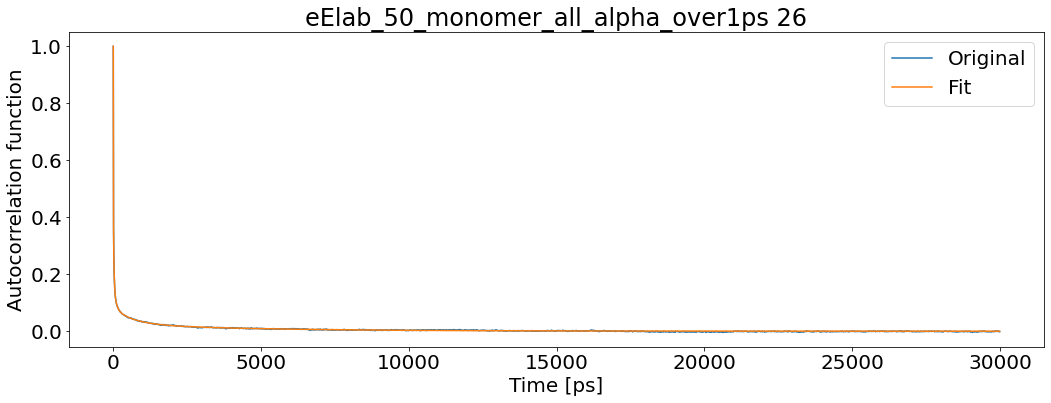

T1: 4.287653548381207 T2: 2.214750636728819 NOE: -1.0306000610379424


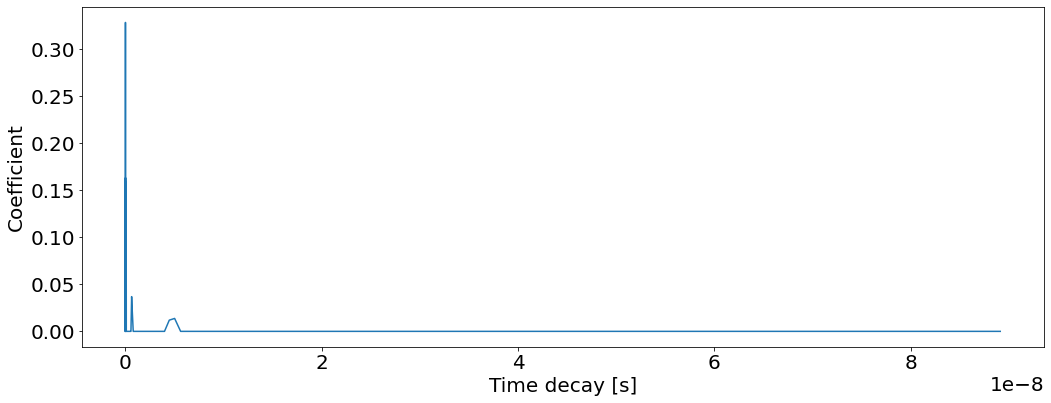

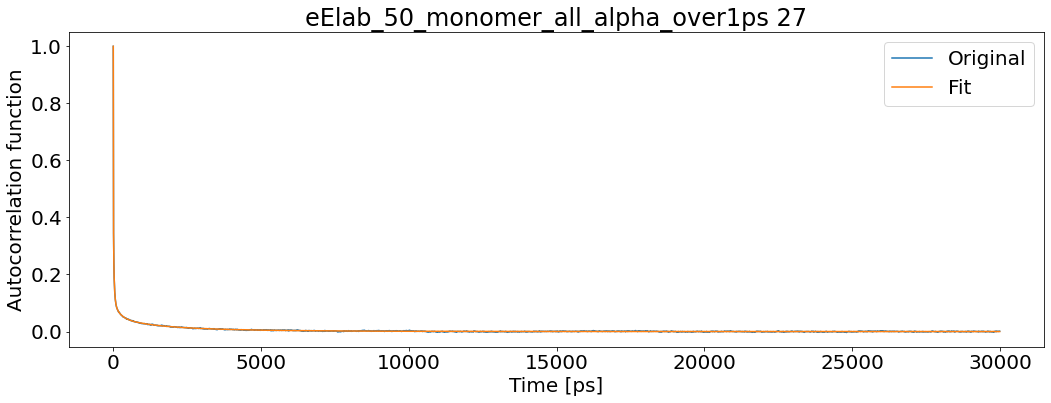

T1: 4.379105499568379 T2: 2.7778752522967163 NOE: -1.0045599810553258


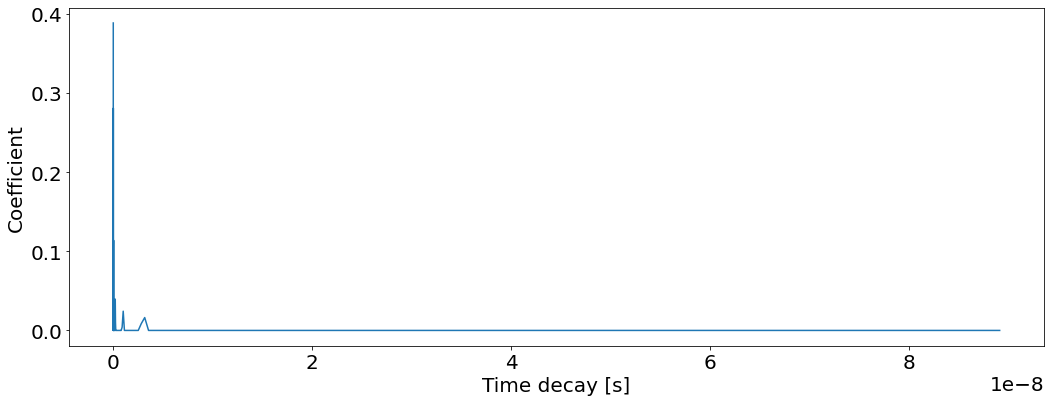

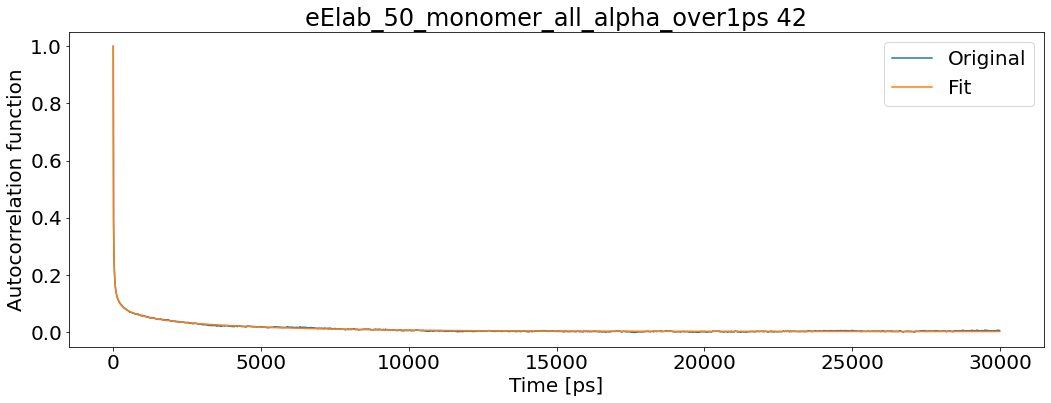

T1: 3.3393035322563787 T2: 0.9084327099695233 NOE: -0.7034482308550856


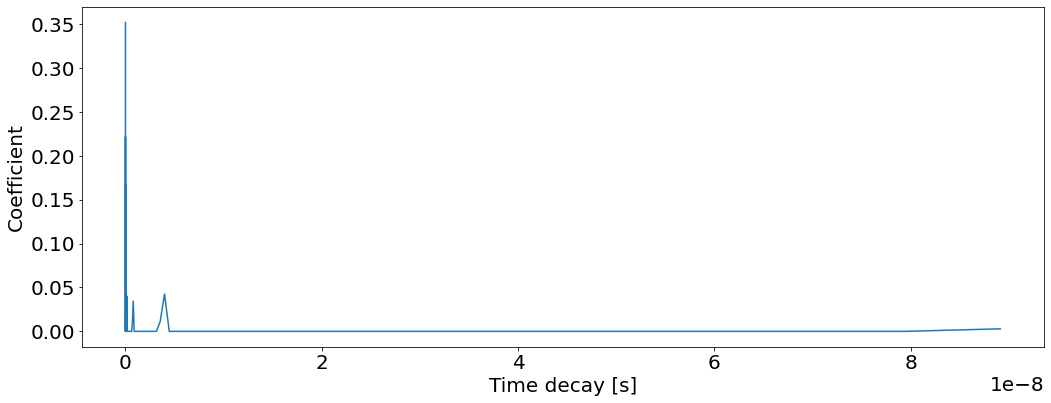

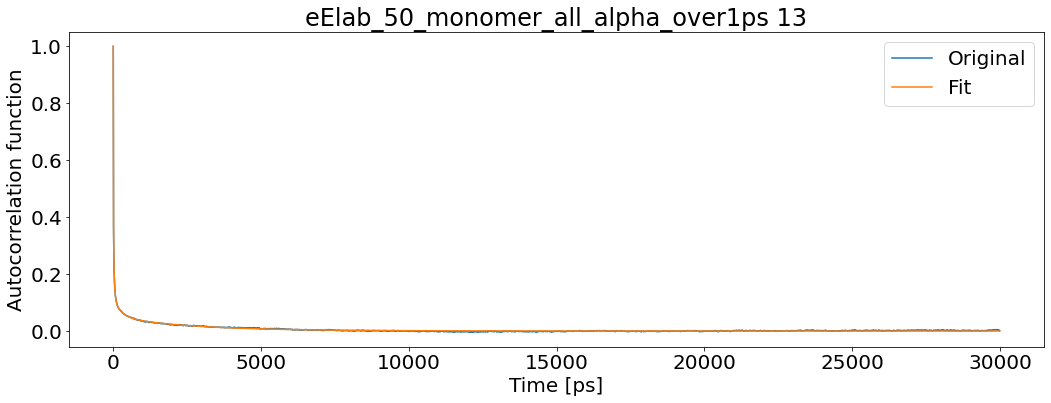

T1: 3.946138288943508 T2: 1.4592950697164742 NOE: -0.9051563080193898


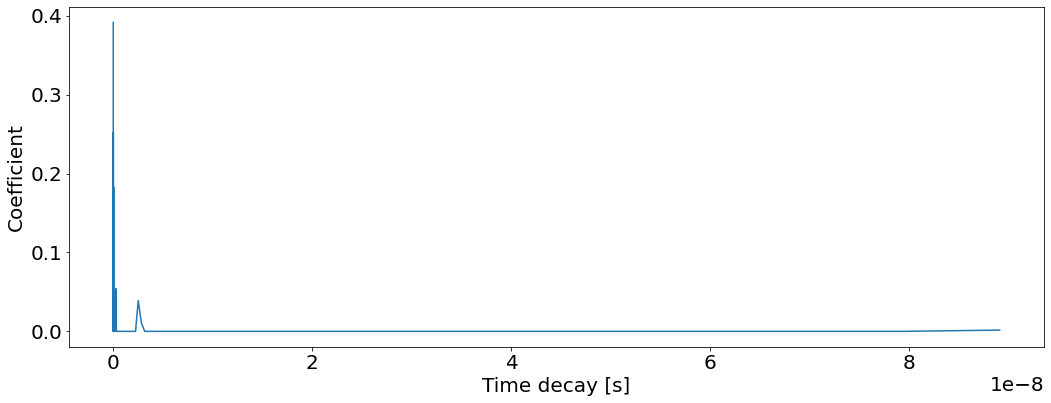

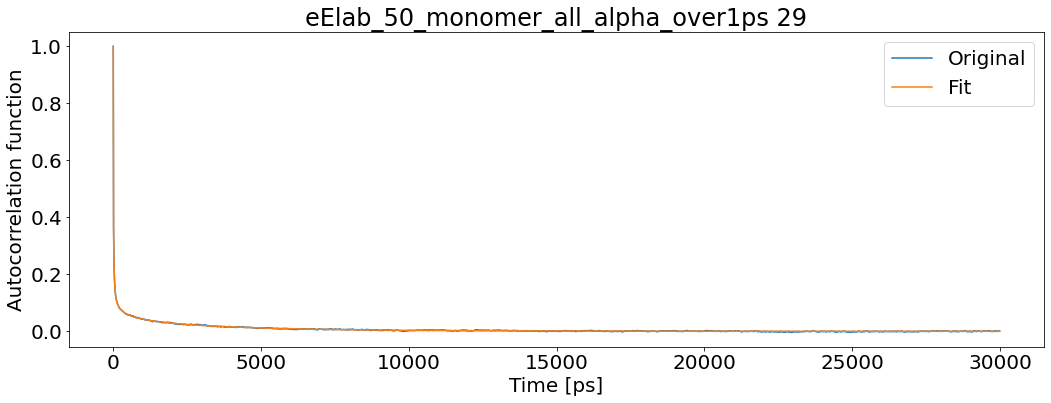

T1: 3.8466090170682823 T2: 1.8618343061046254 NOE: -0.8407045817810752


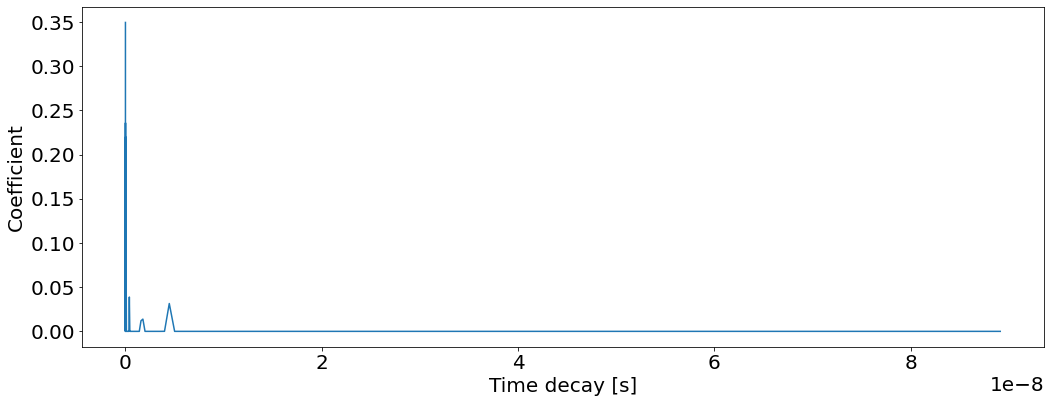

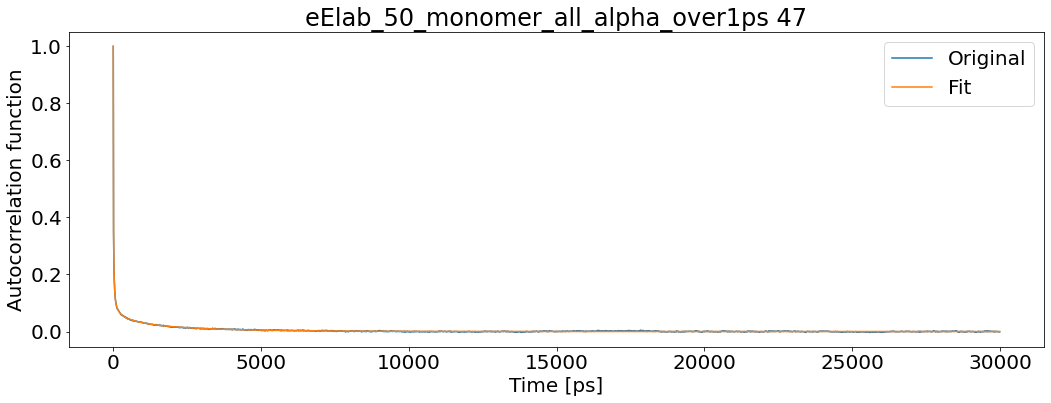

T1: 4.210009338548618 T2: 2.664263107586703 NOE: -0.9224168709206282


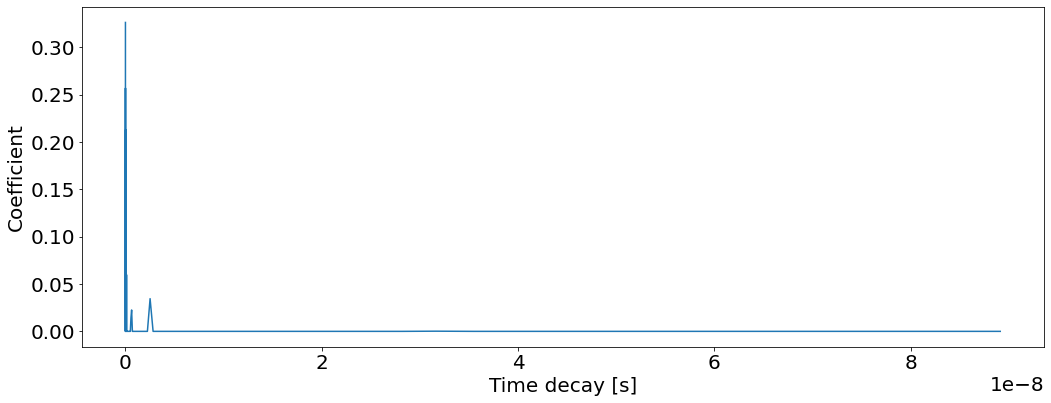

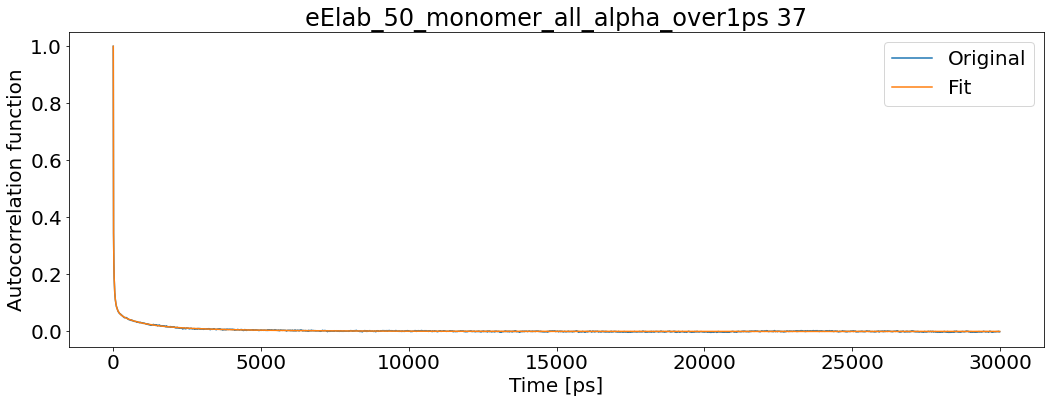

T1: 4.348733399430229 T2: 2.854613218044857 NOE: -0.9181042051650814


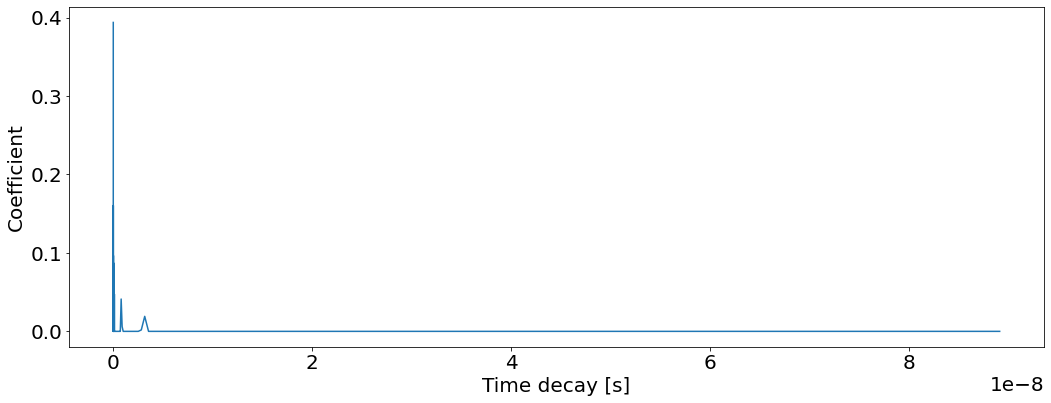

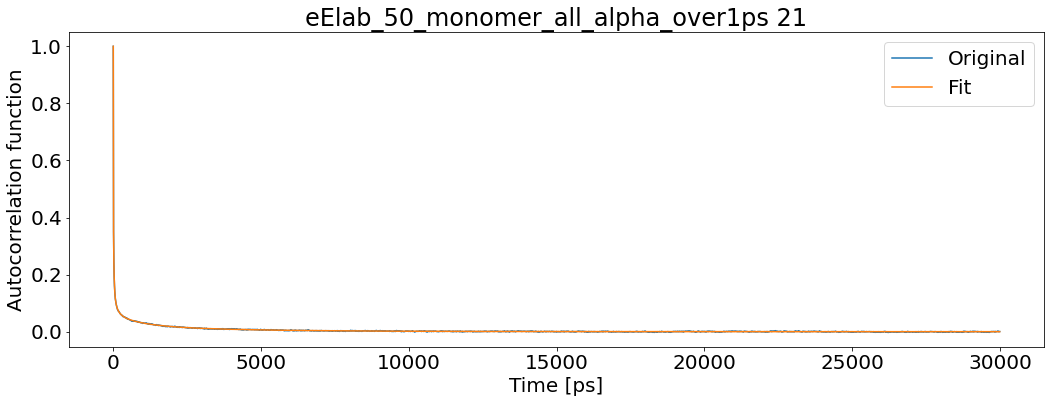

T1: 4.28592224381695 T2: 2.558114337194433 NOE: -1.0334270662850087


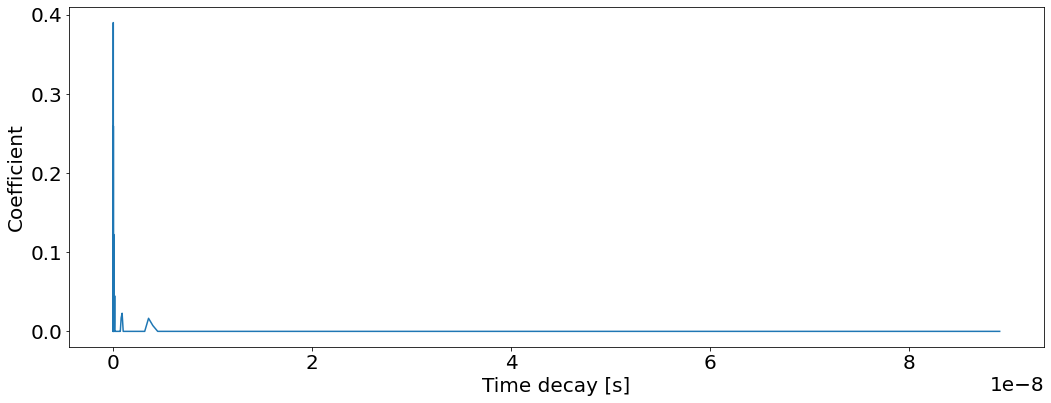

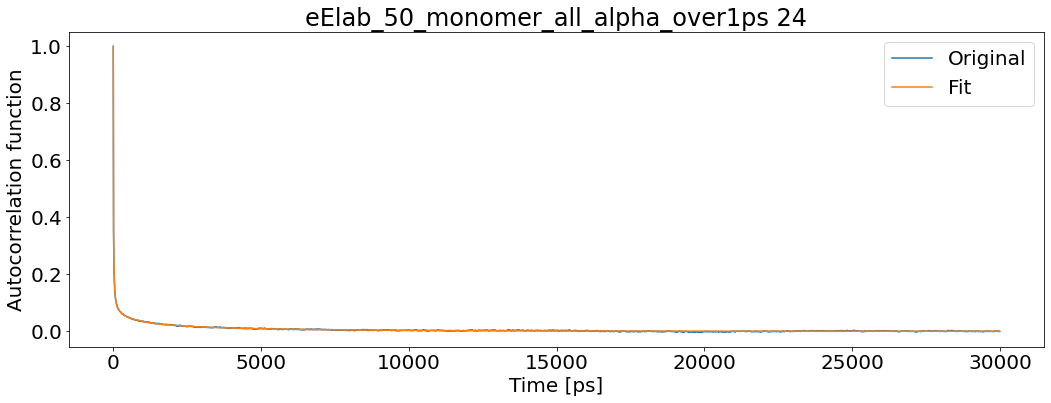

T1: 4.223105504955273 T2: 2.211819552408302 NOE: -0.9949088469057192


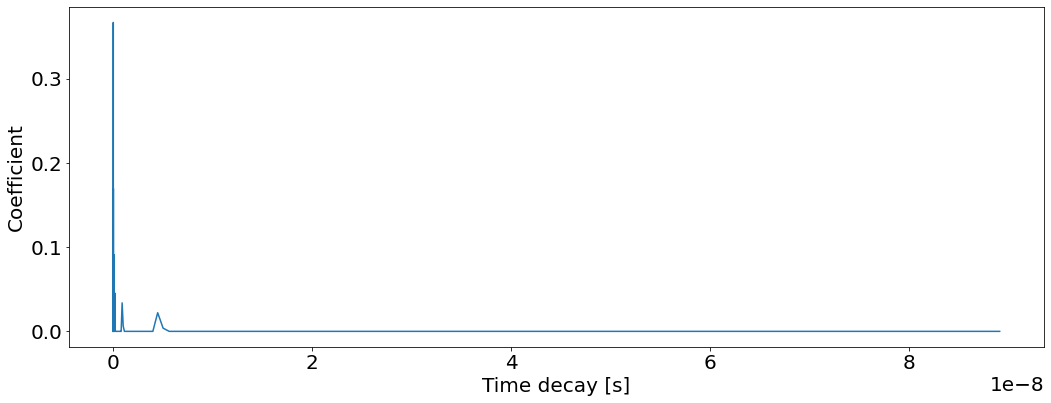

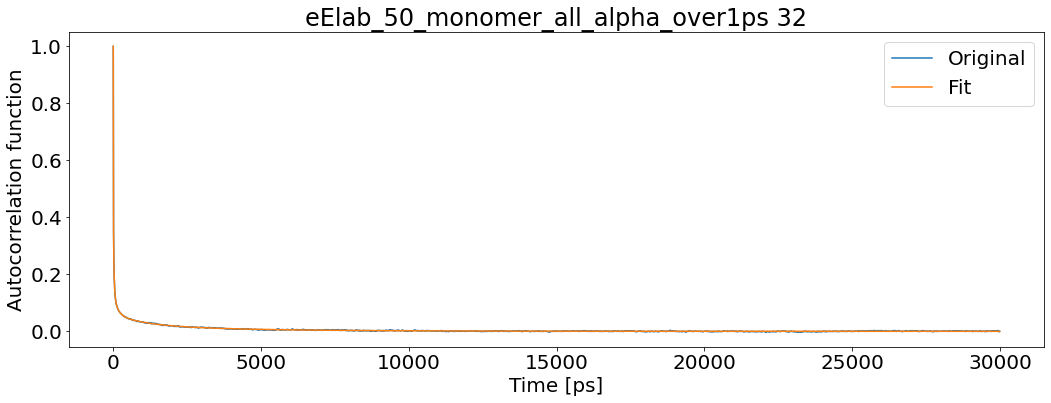

T1: 4.195975290802929 T2: 2.3297102999331316 NOE: -1.0265087826222468


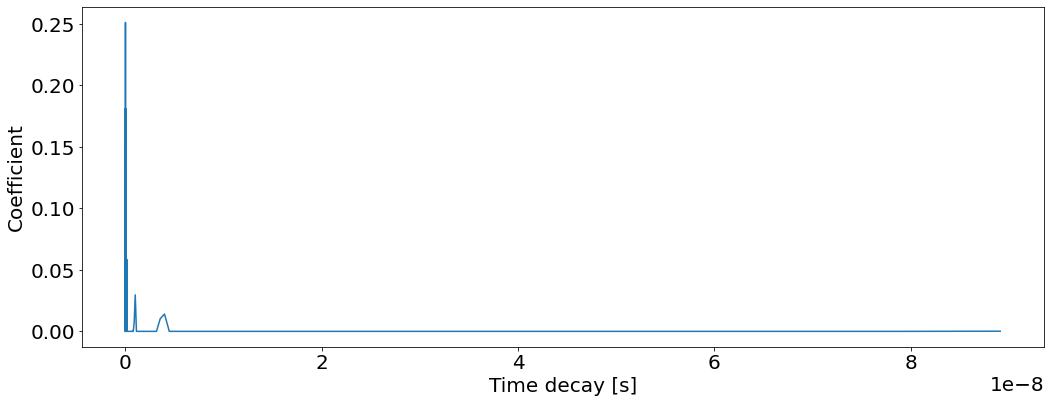

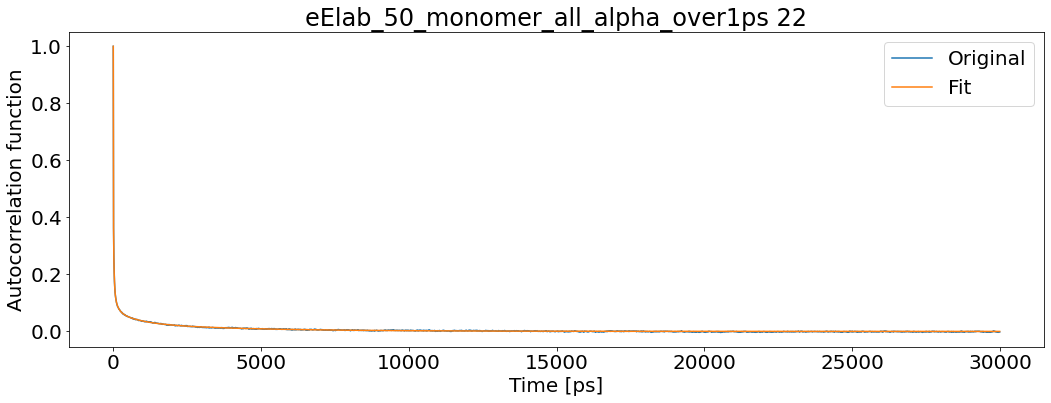

T1: 4.002161418040417 T2: 2.1438414602289058 NOE: -0.9759688170650276


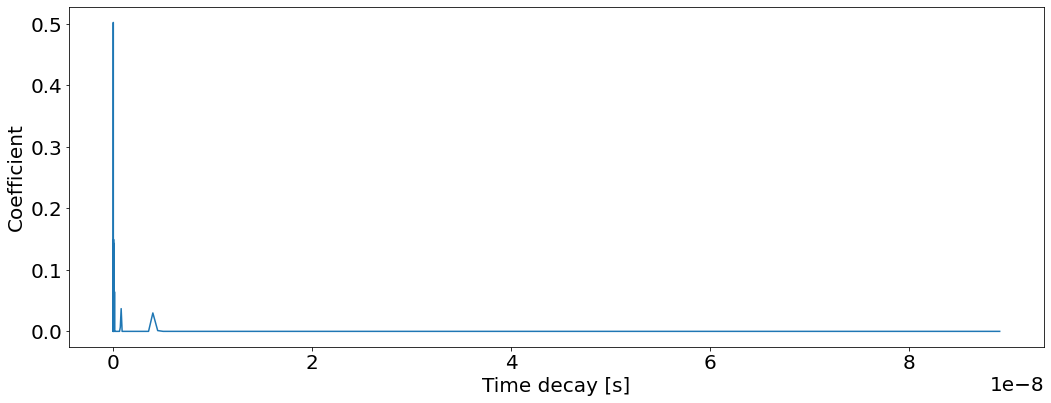

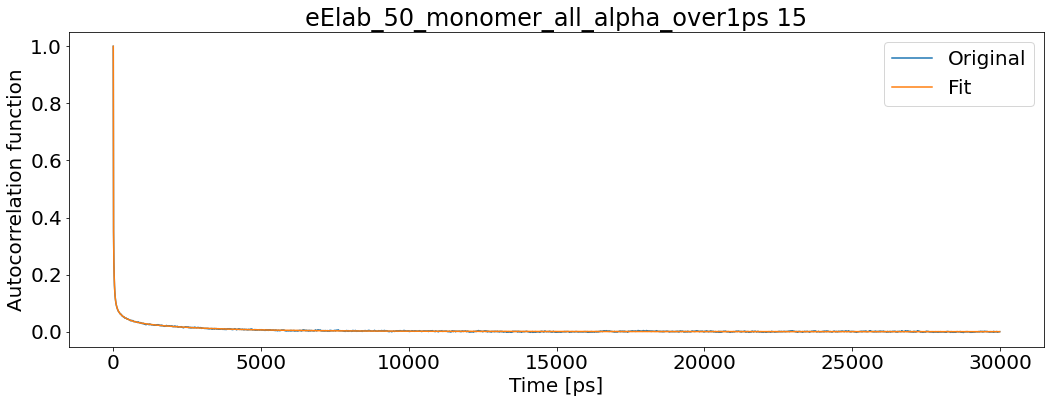

T1: 4.297645505300201 T2: 2.4067610172885843 NOE: -1.0917298203825134


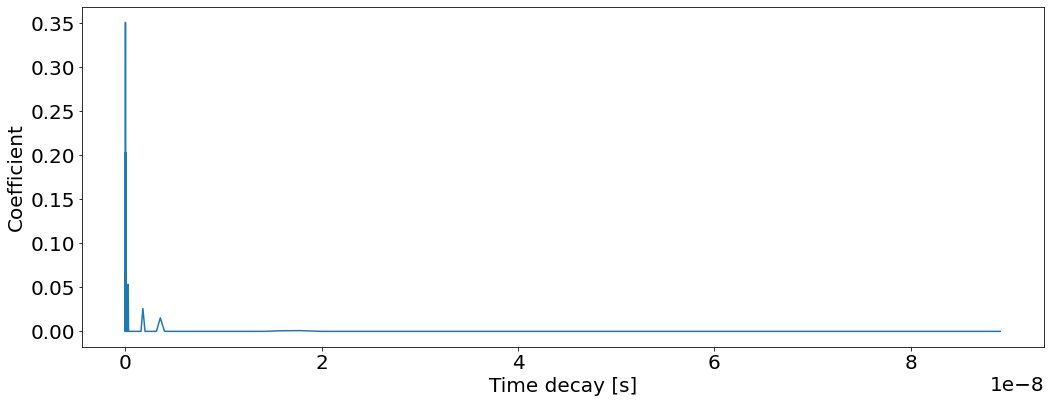

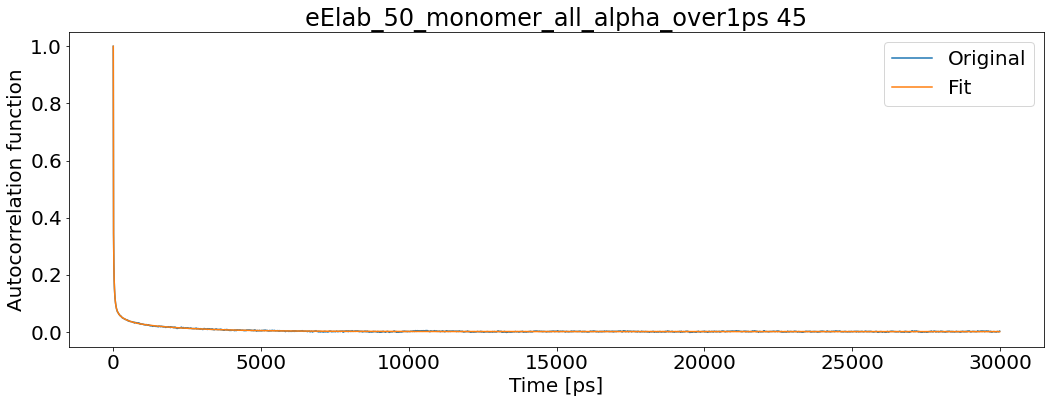

T1: 4.528775804370346 T2: 2.0910012952003942 NOE: -1.0200700196975268


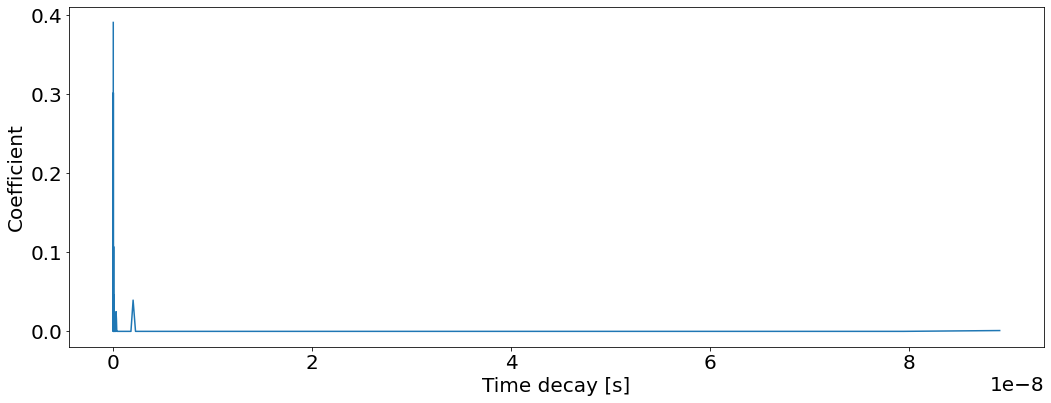

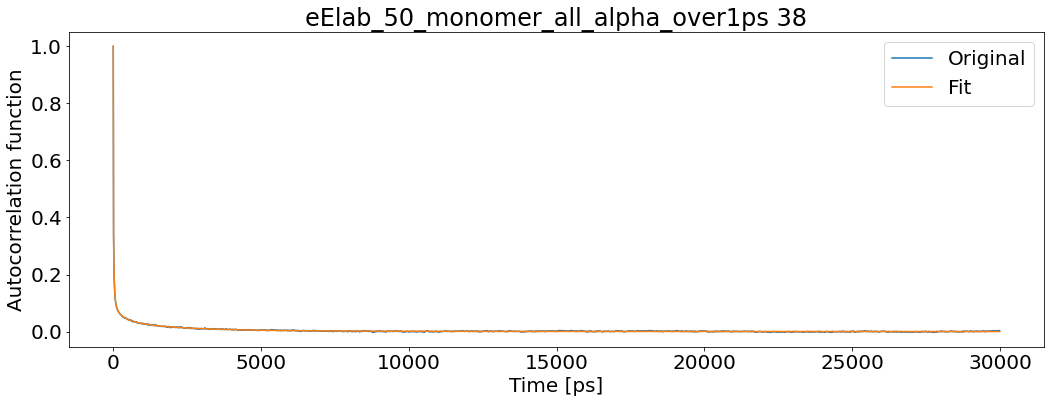

T1: 4.399576806937396 T2: 2.67503101063884 NOE: -0.9888527531595288


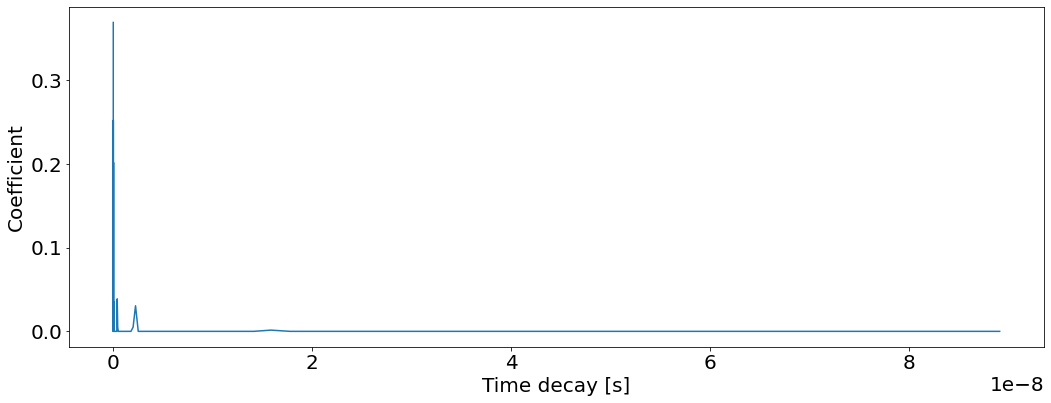

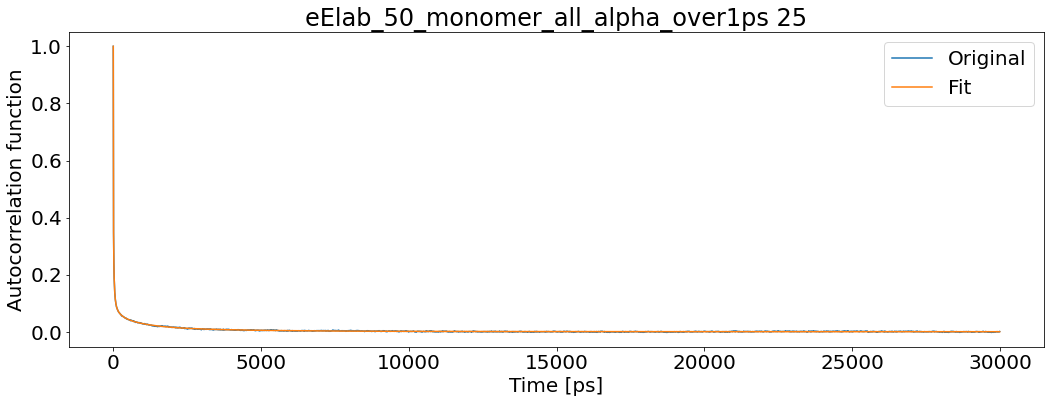

T1: 4.385048353466831 T2: 2.180890462503661 NOE: -0.9823471255905813


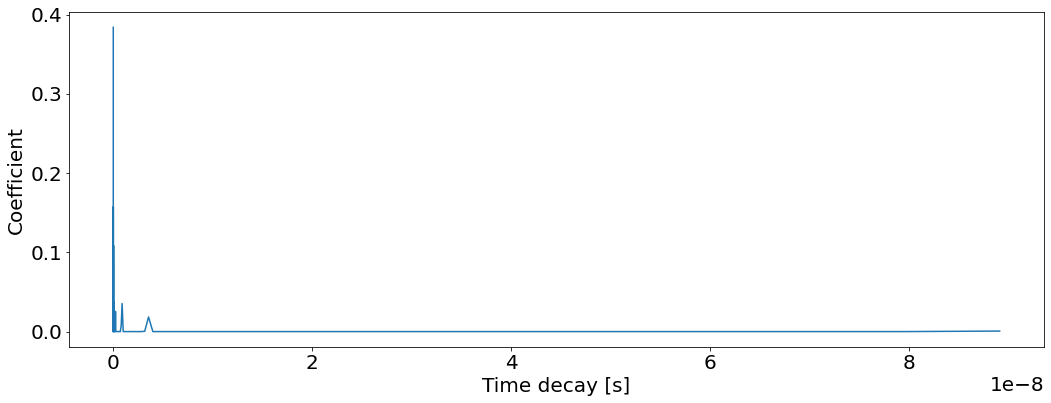

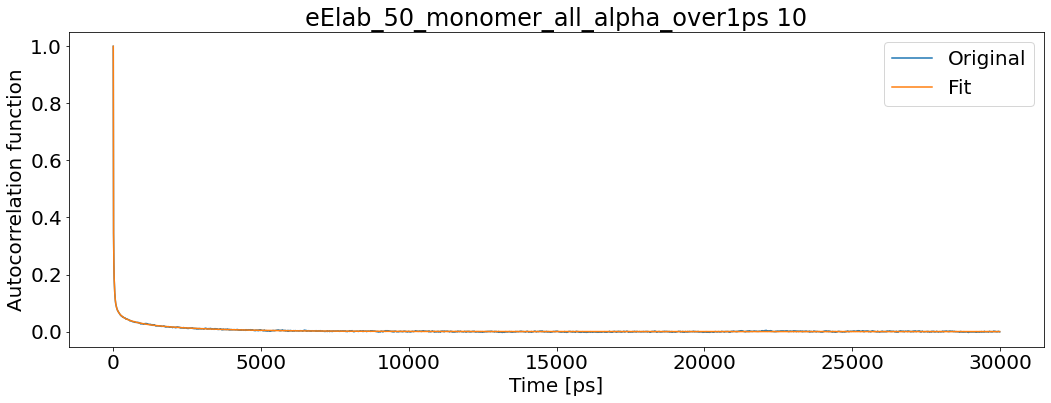

T1: 4.398897015007891 T2: 2.8978734551860743 NOE: -0.9983463286519121


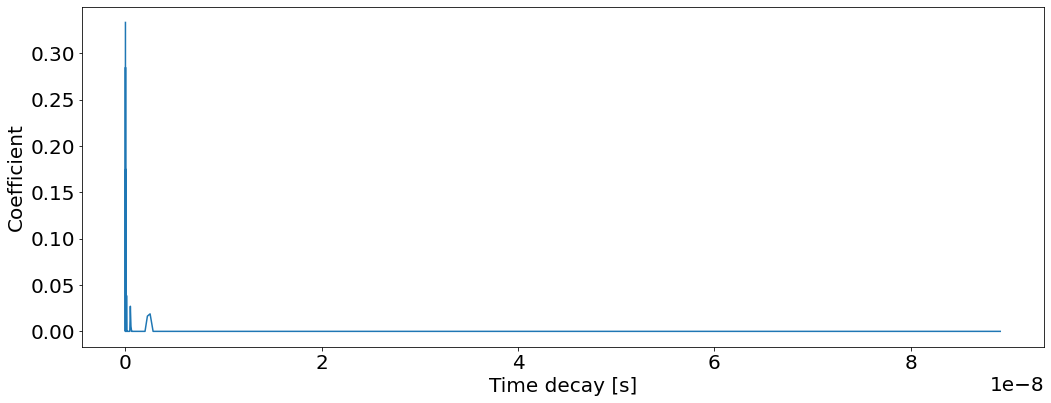

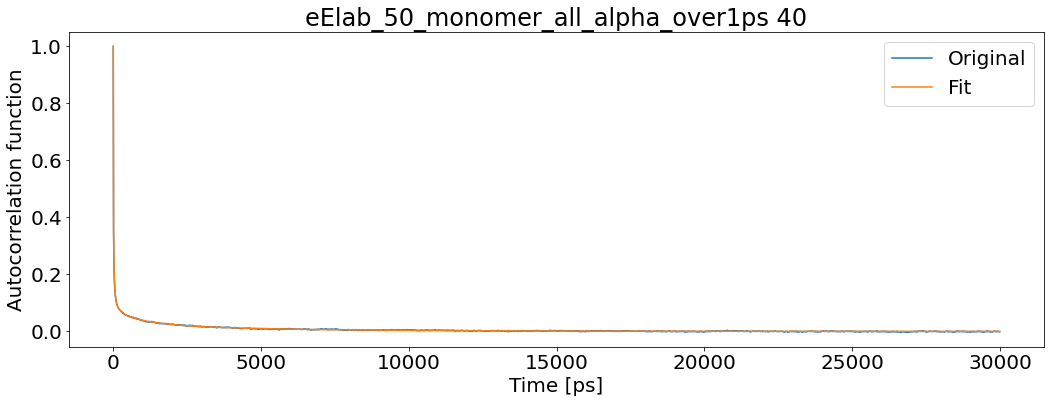

T1: 4.01502156307446 T2: 1.9976262969957657 NOE: -0.8583501061375531


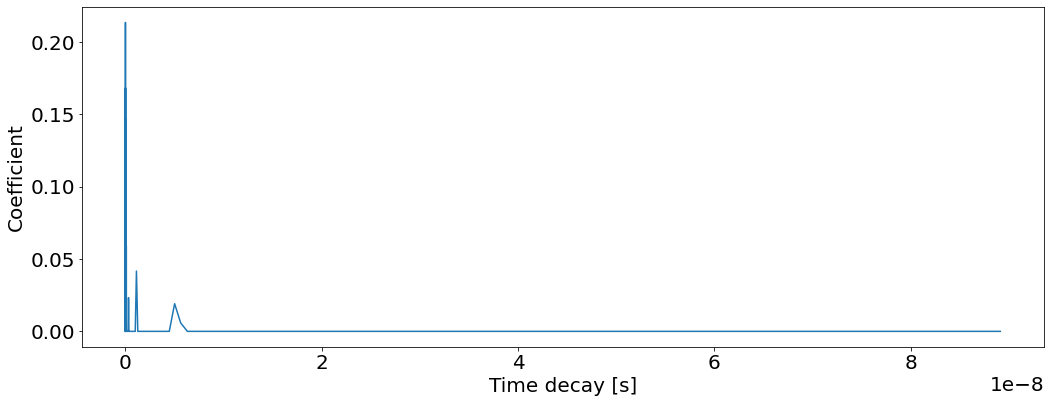

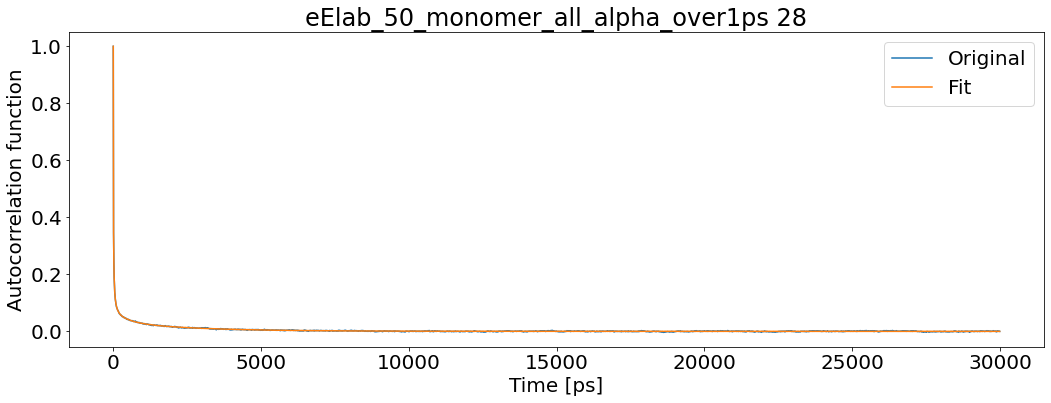

T1: 4.453674472918507 T2: 2.232432187194822 NOE: -1.030482292308056


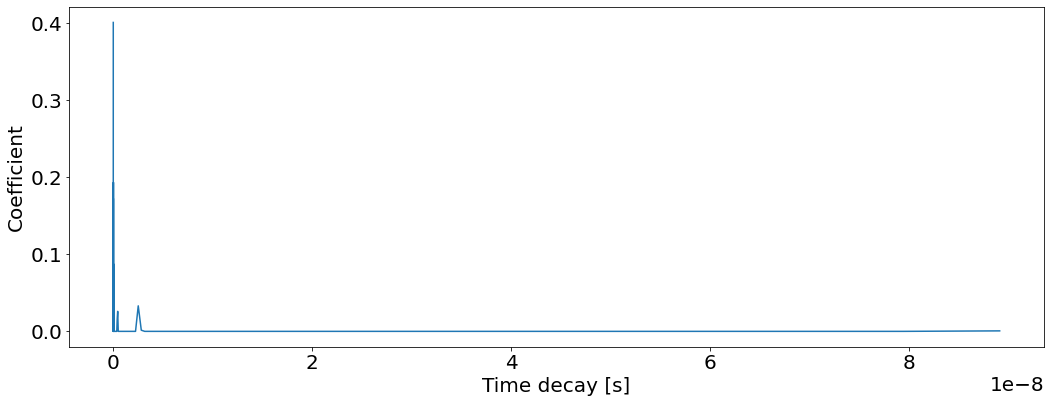

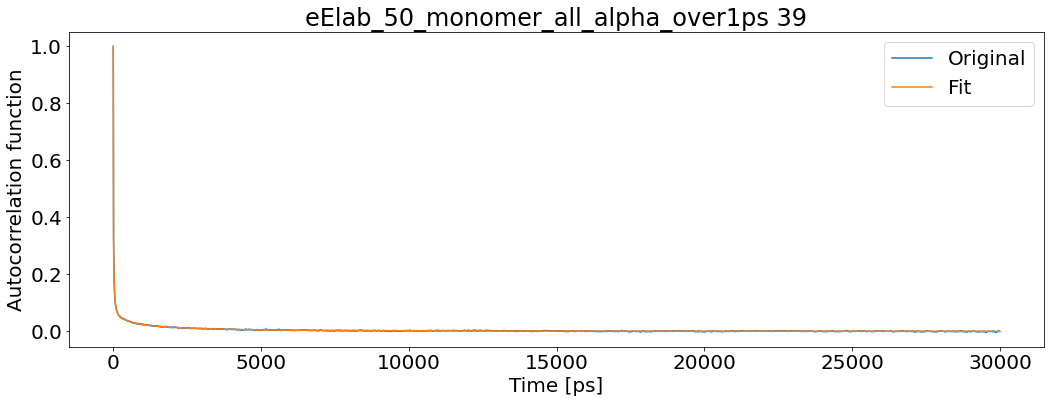

T1: 5.030151788454345 T2: 2.9492891144411253 NOE: -1.1446971127753107


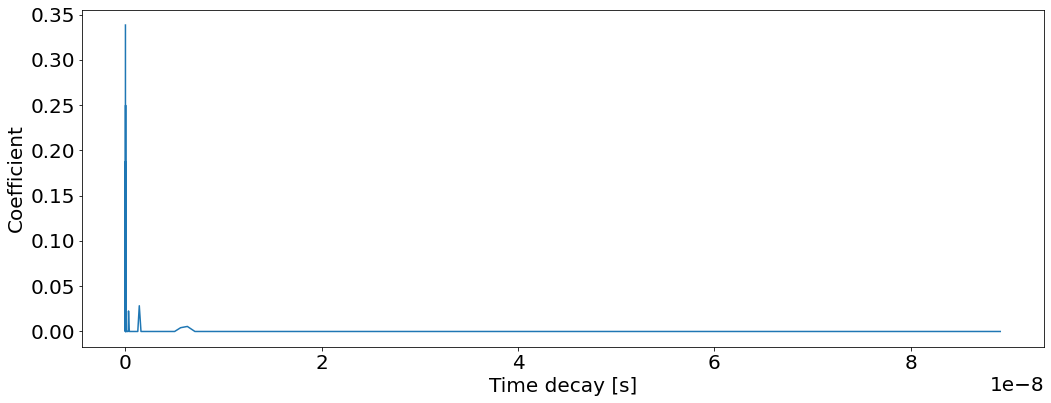

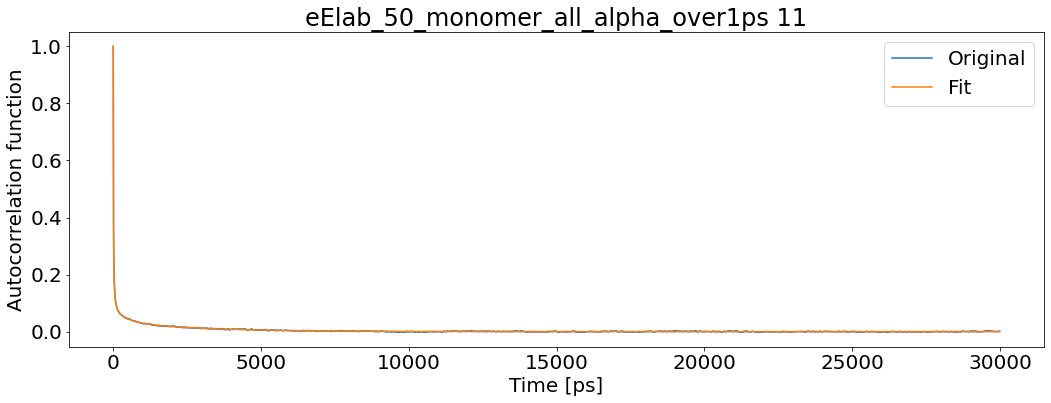

T1: 4.320015916652777 T2: 2.346773548614074 NOE: -0.9712280155218602


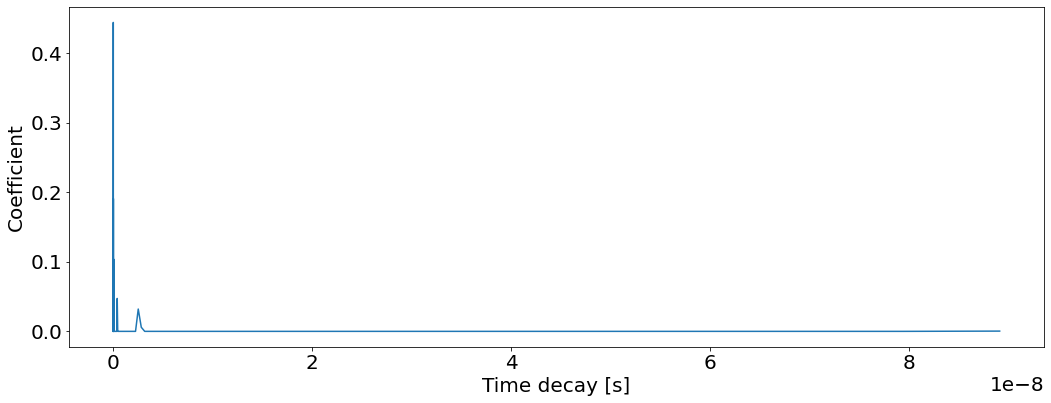

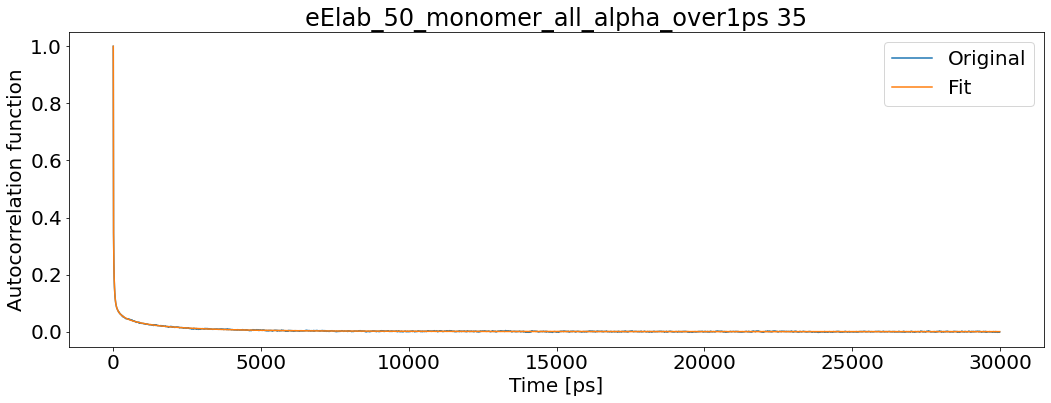

T1: 4.318433112812146 T2: 2.7212219270037017 NOE: -0.9252134565777579


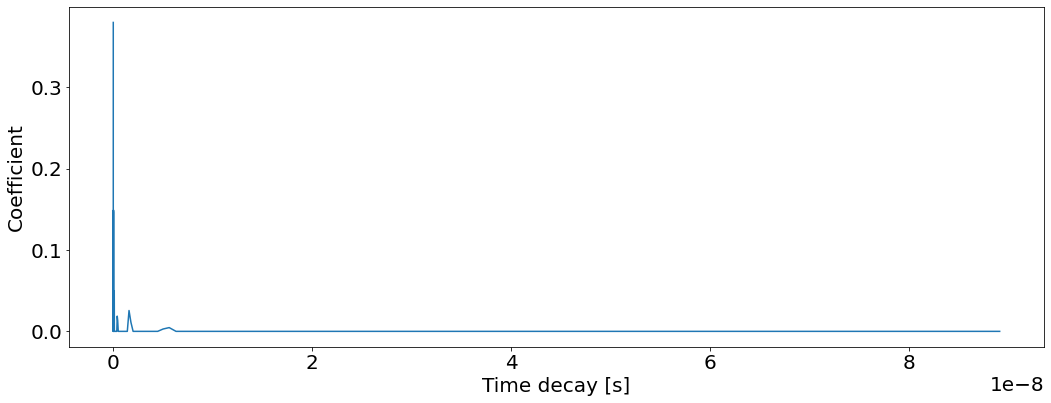

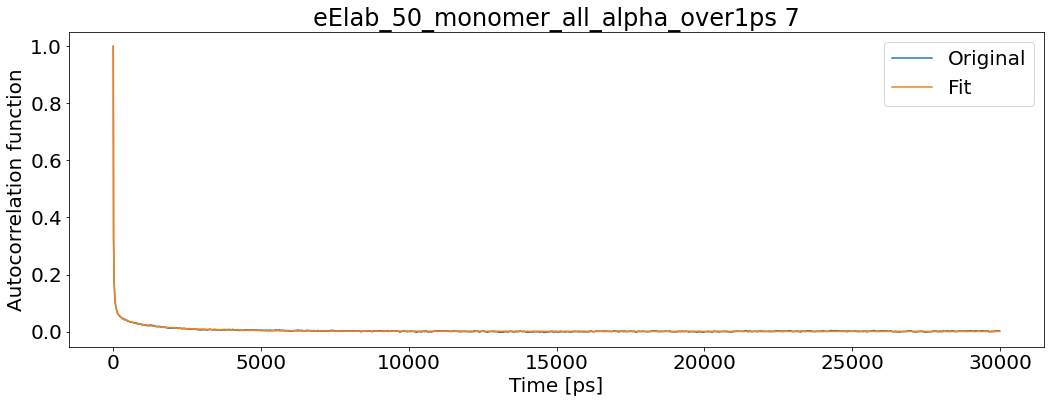

T1: 4.798339732199851 T2: 2.46713729204101 NOE: -1.084505963820599


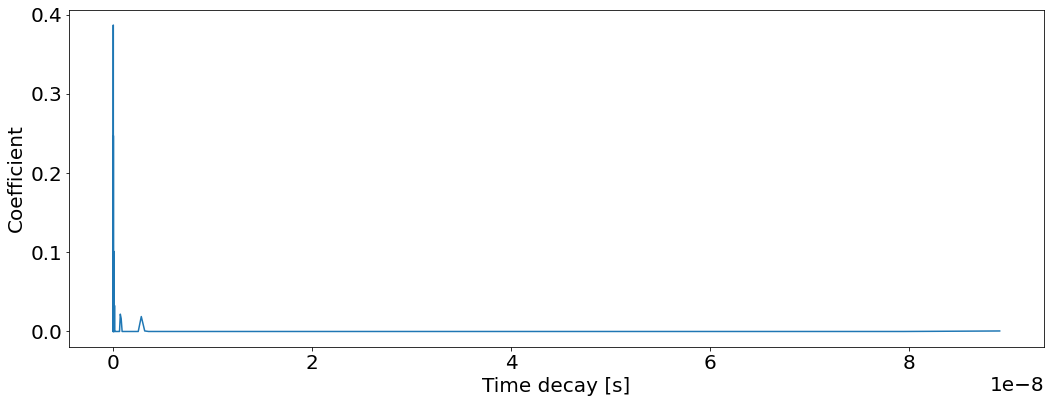

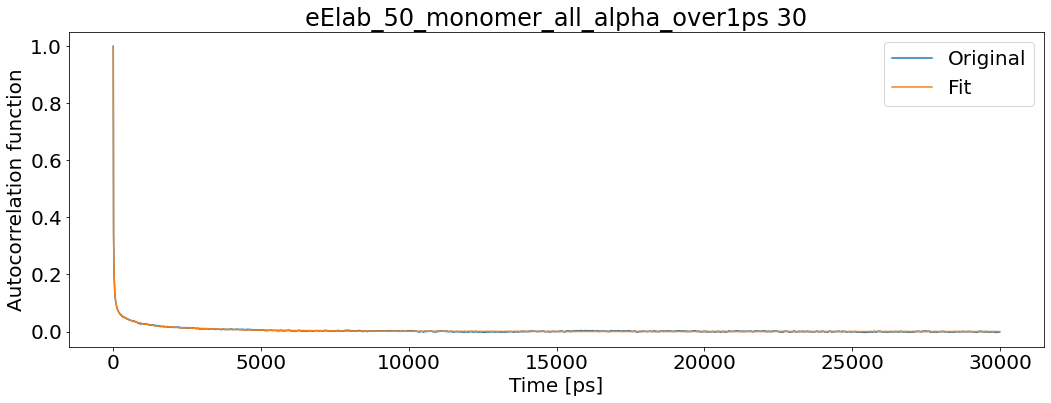

T1: 4.360042646731286 T2: 2.773210784680272 NOE: -1.062646339562237


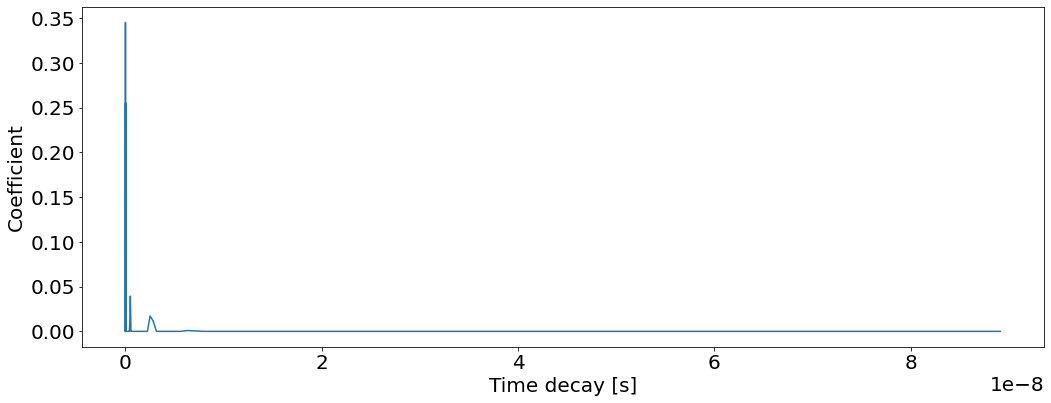

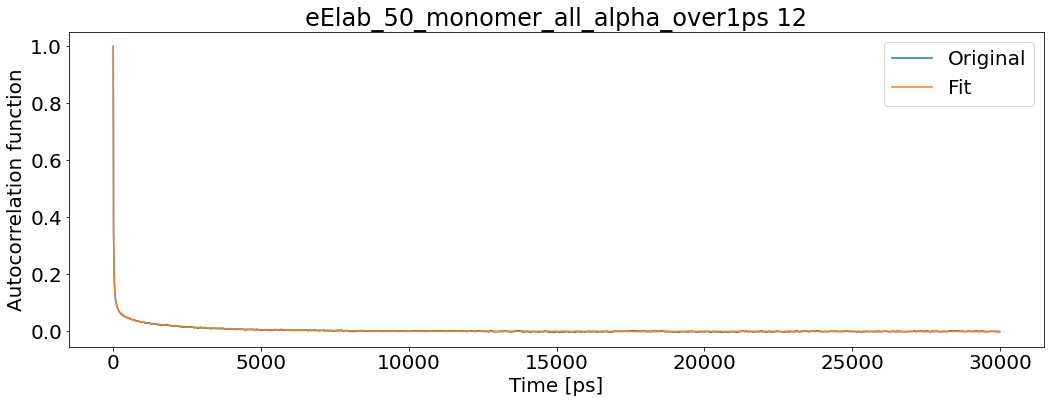

T1: 4.115925536244126 T2: 2.4755478072367914 NOE: -0.9518623838615214


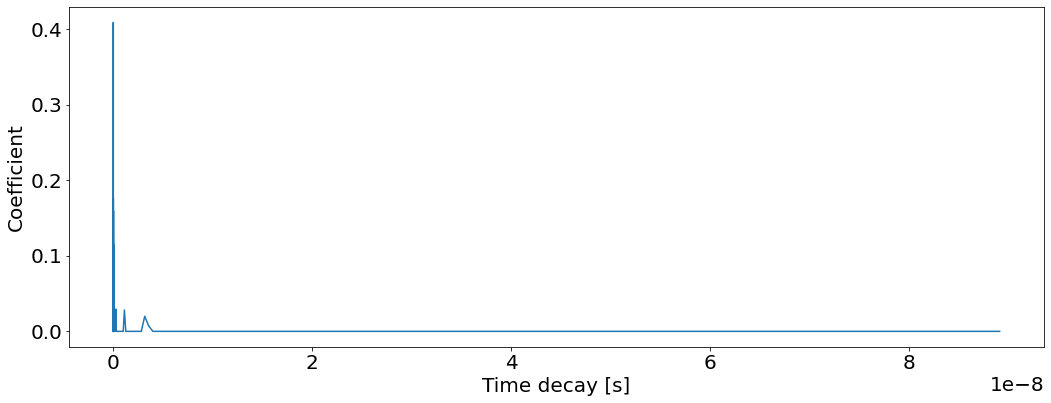

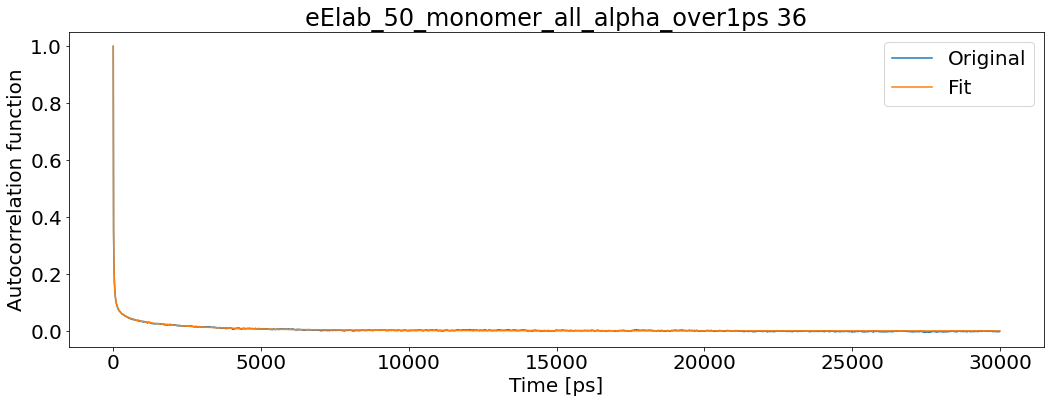

T1: 4.0719951435201125 T2: 2.3572455409529676 NOE: -0.9815981230410775


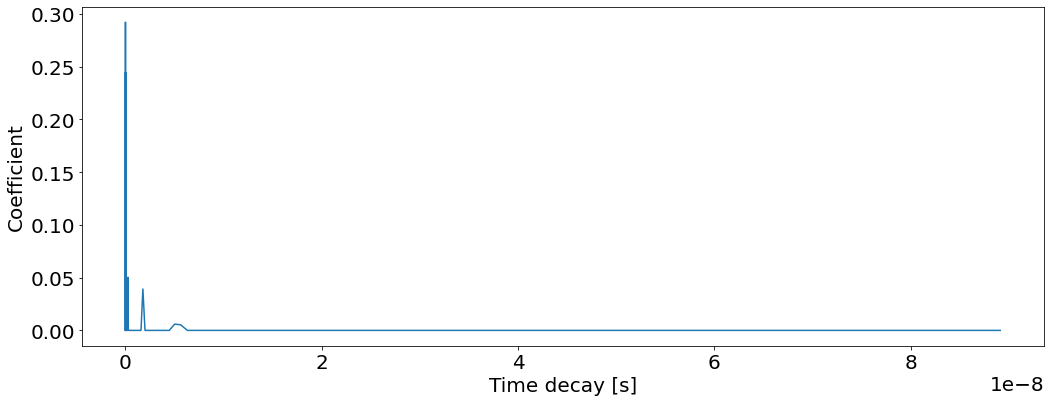

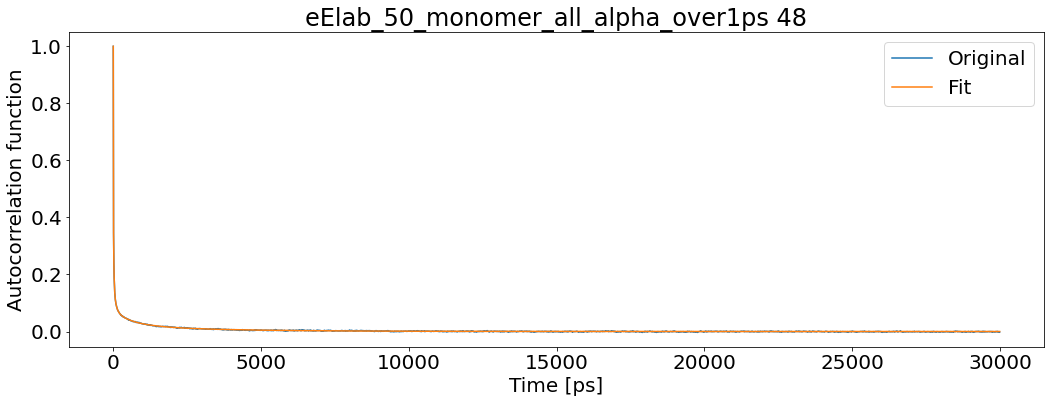

T1: 4.428622100757962 T2: 2.8352328597985106 NOE: -1.0321373644646572


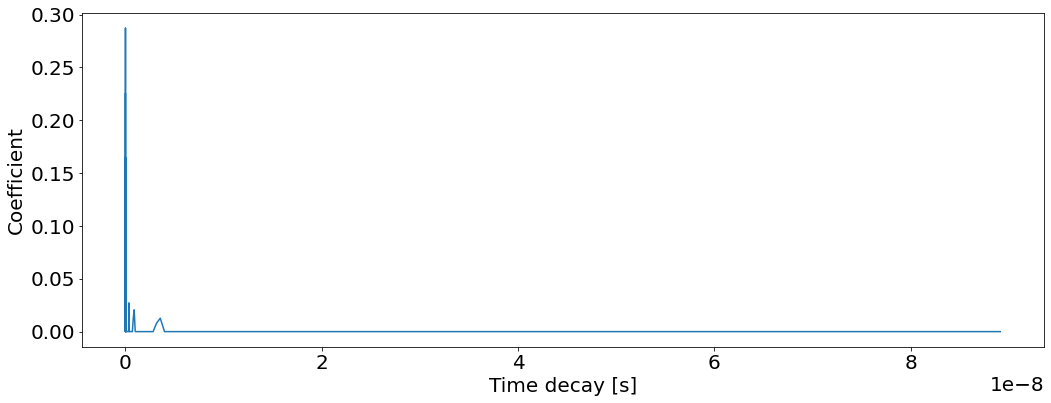

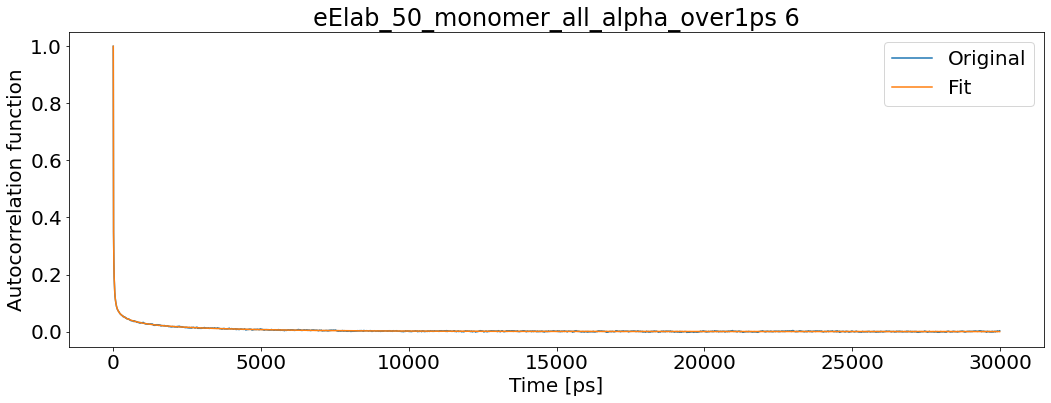

T1: 4.489519410856233 T2: 2.5042692986925315 NOE: -1.0550725608497378


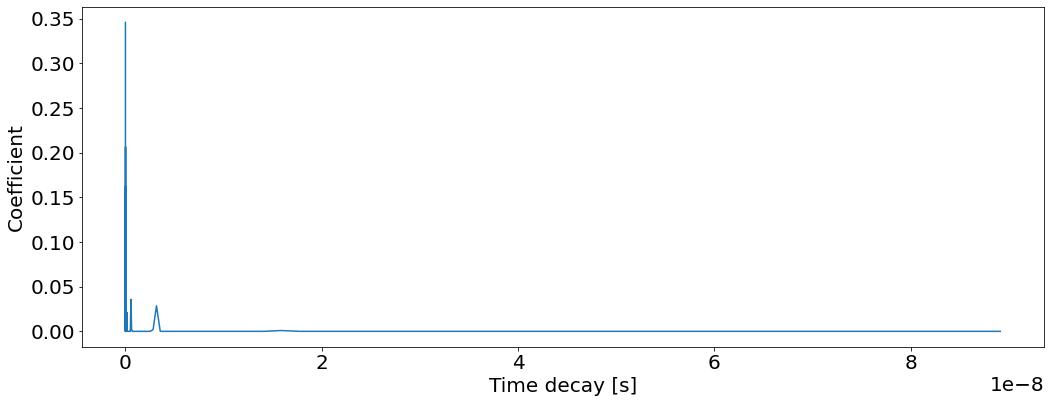

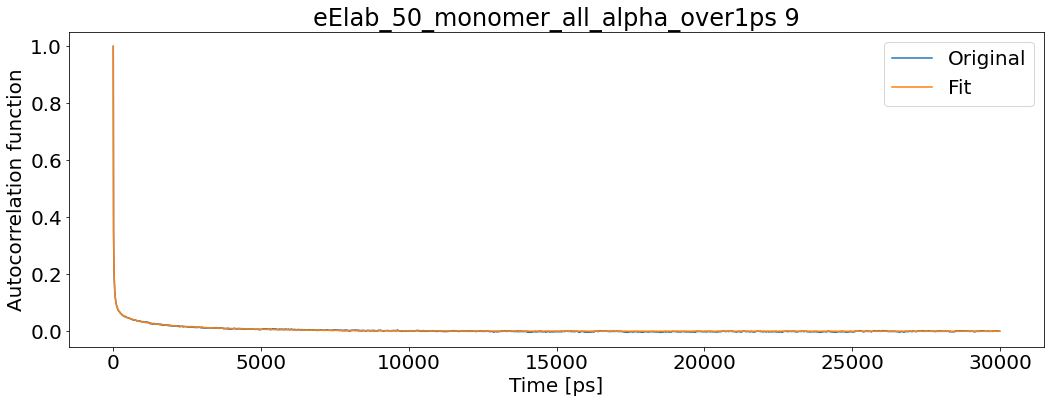

T1: 4.296033641079045 T2: 2.494407130577183 NOE: -0.9299235323822153


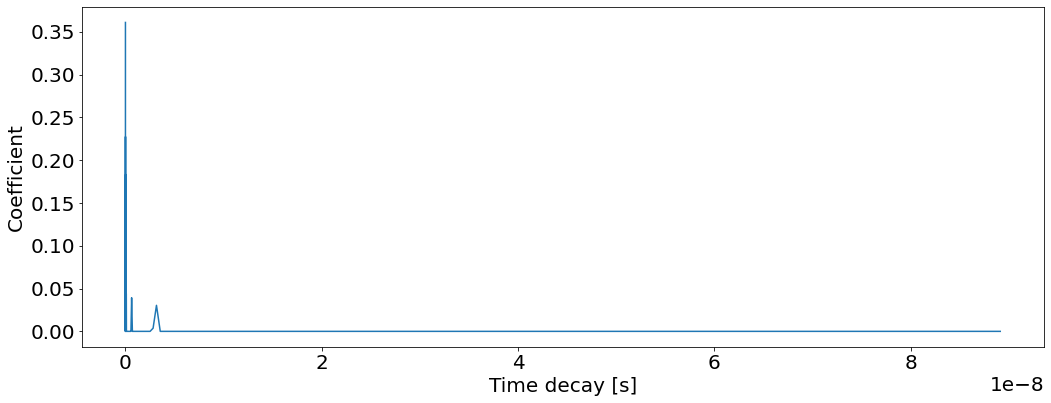

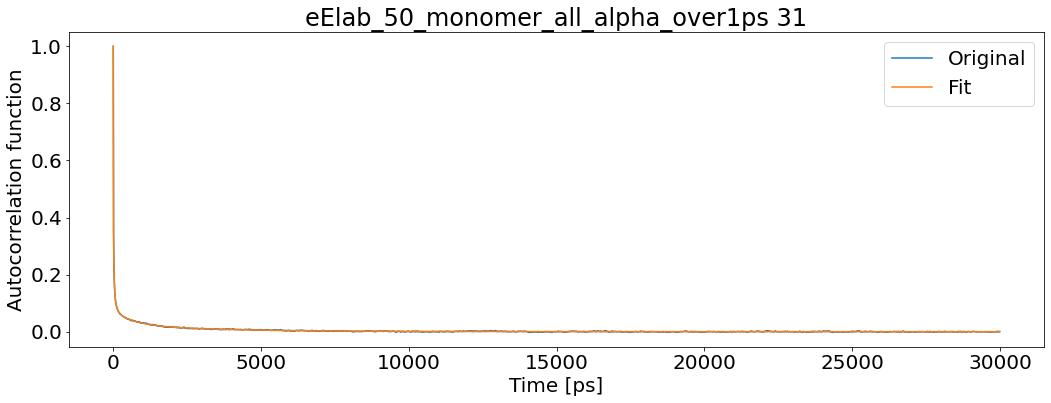

T1: 4.3648071986954 T2: 2.704084945427814 NOE: -0.958226326515002


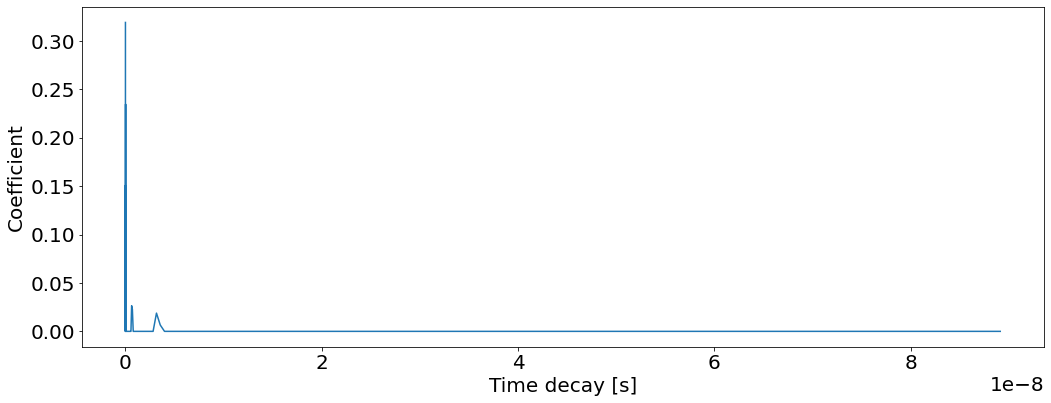

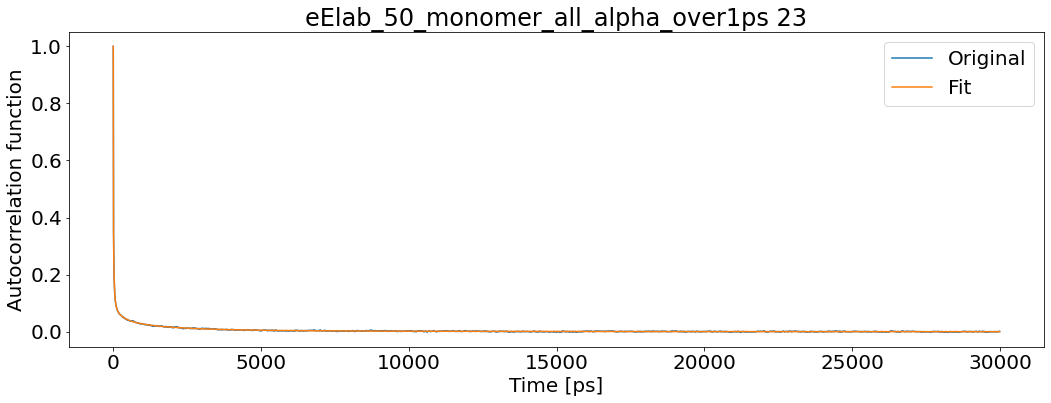

T1: 4.496081343638869 T2: 2.361639147217294 NOE: -1.0368690738432944


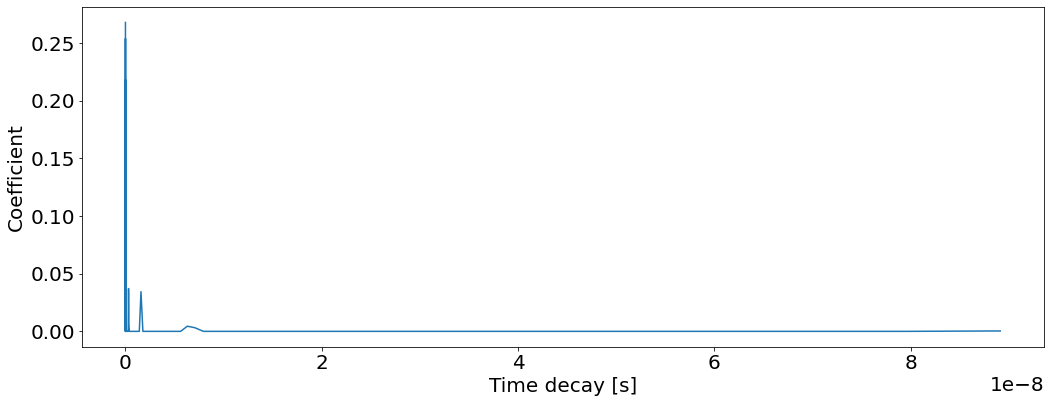

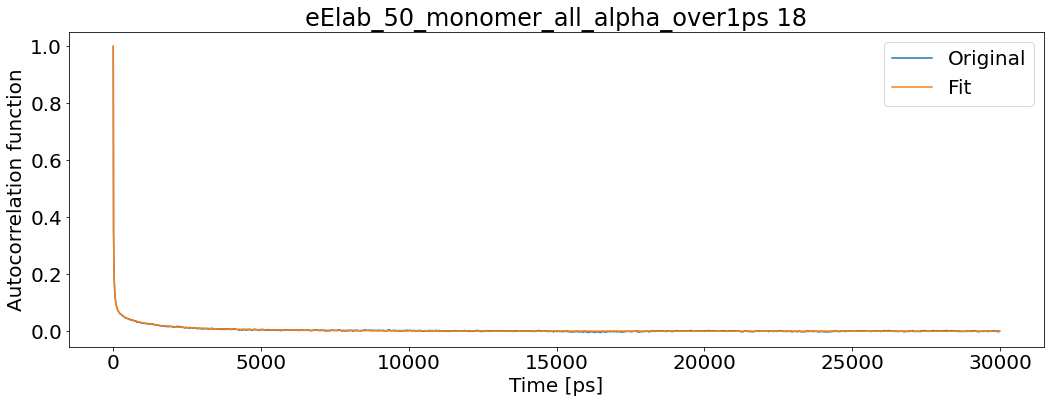

T1: 4.344179877497112 T2: 2.606503808963436 NOE: -0.9664038497266856


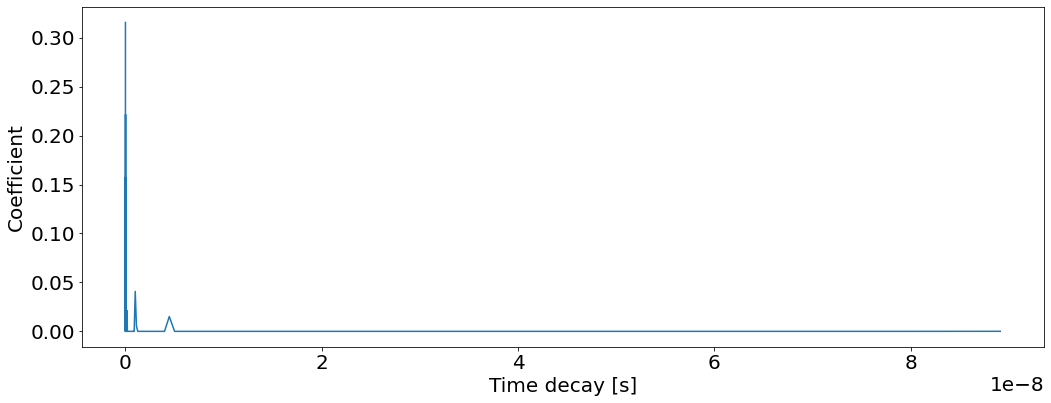

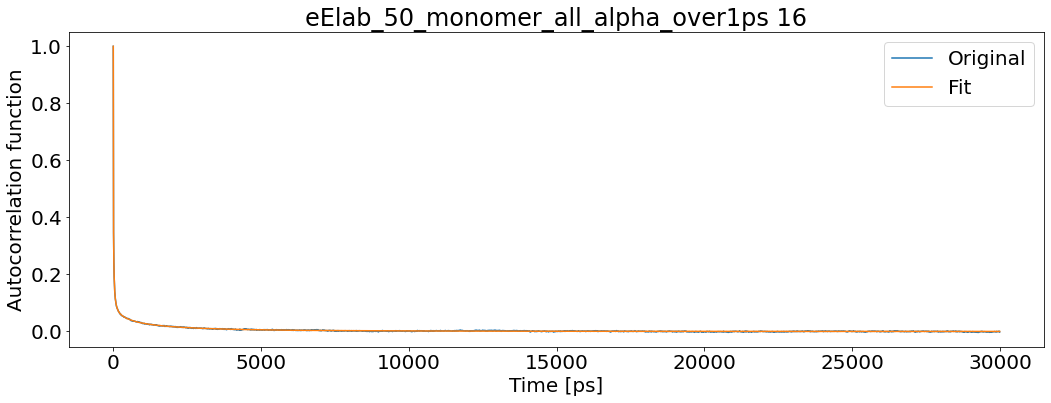

T1: 4.372088113313946 T2: 2.595957430467938 NOE: -0.9915791835963979


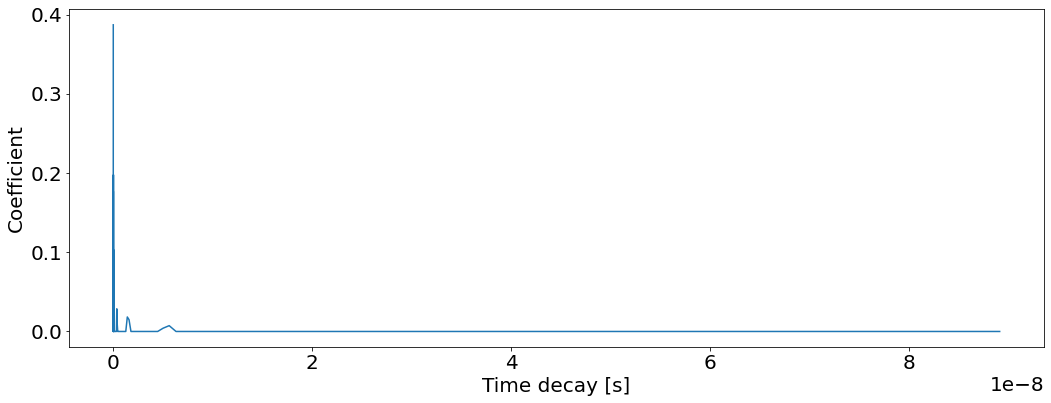

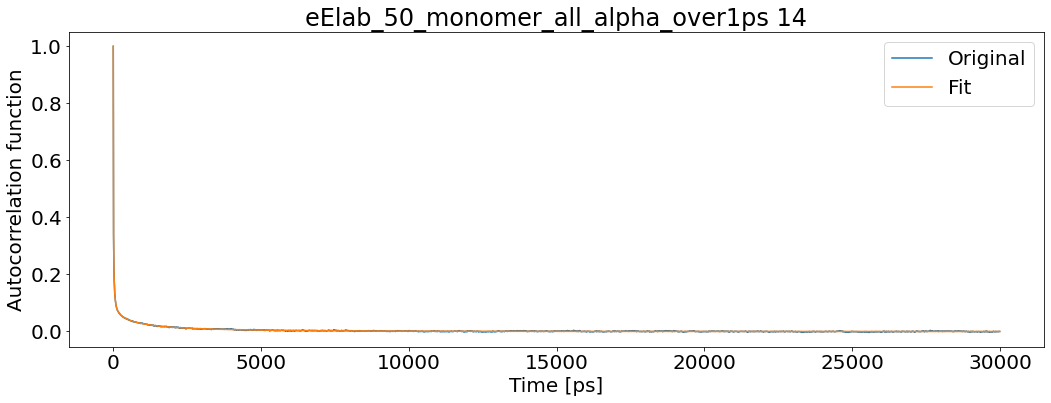

T1: 4.54169866908784 T2: 2.855057692187035 NOE: -1.0060004750271898


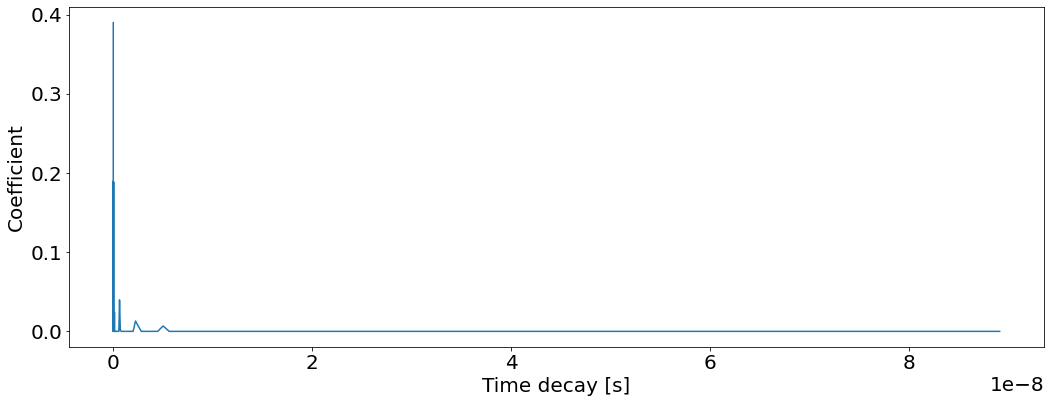

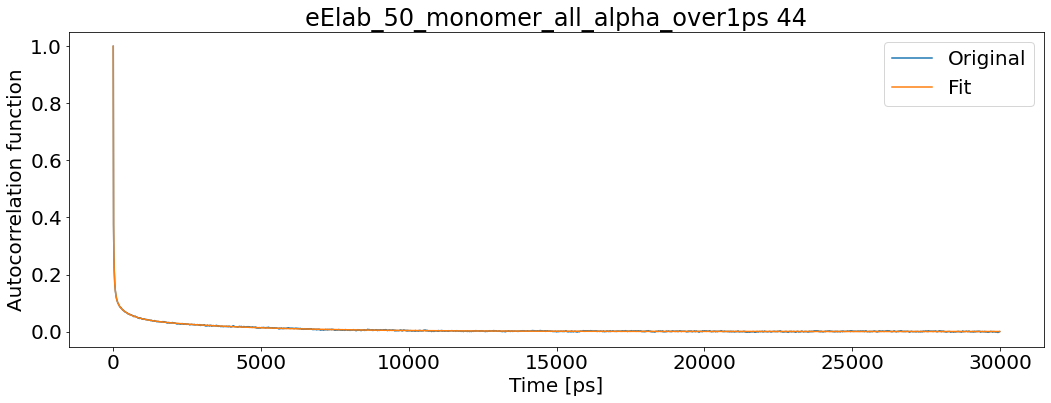

T1: 3.7692854584453617 T2: 1.6450633344384302 NOE: -0.8544422069947555


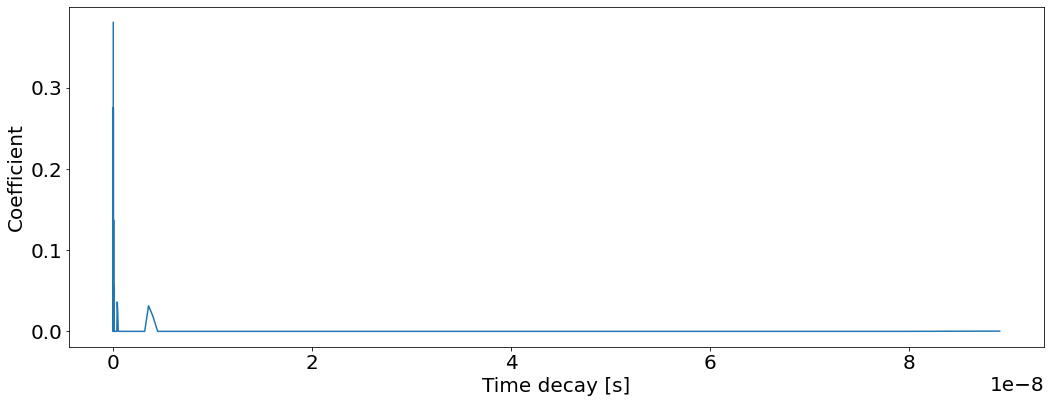

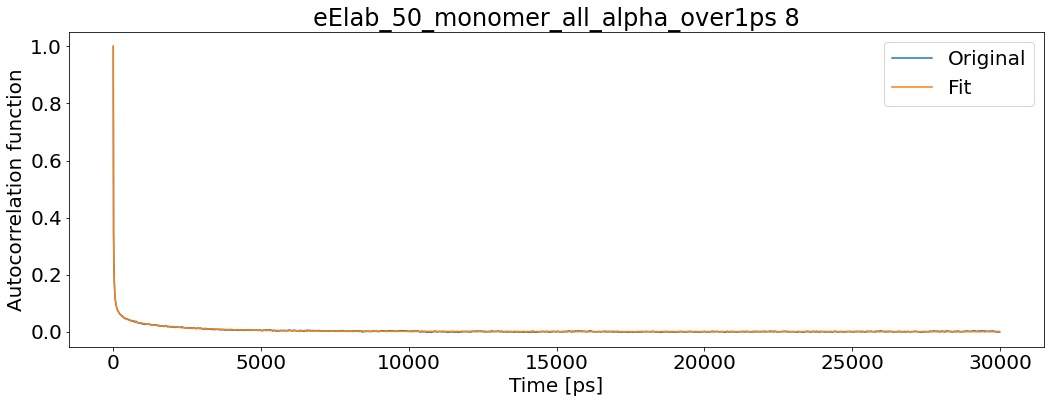

T1: 4.299271117743871 T2: 2.148918381655959 NOE: -1.0145669965800388


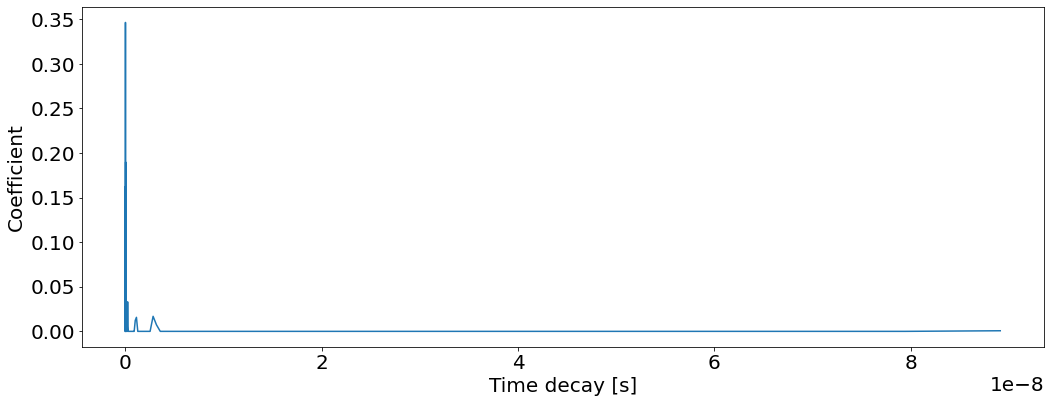

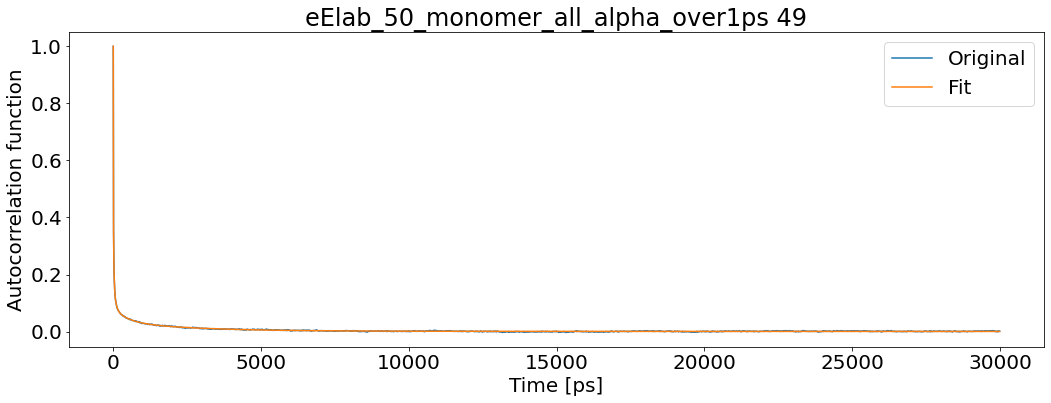

T1: 4.261790759797771 T2: 2.117984094343951 NOE: -0.9765789740345354


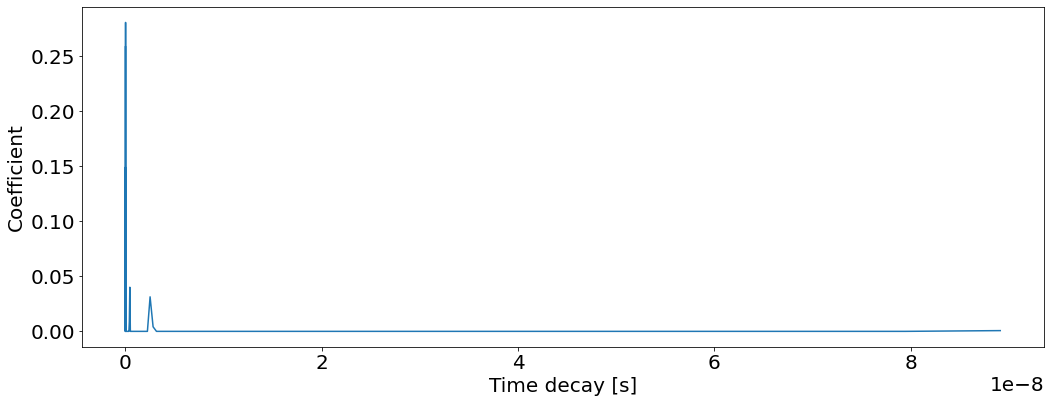

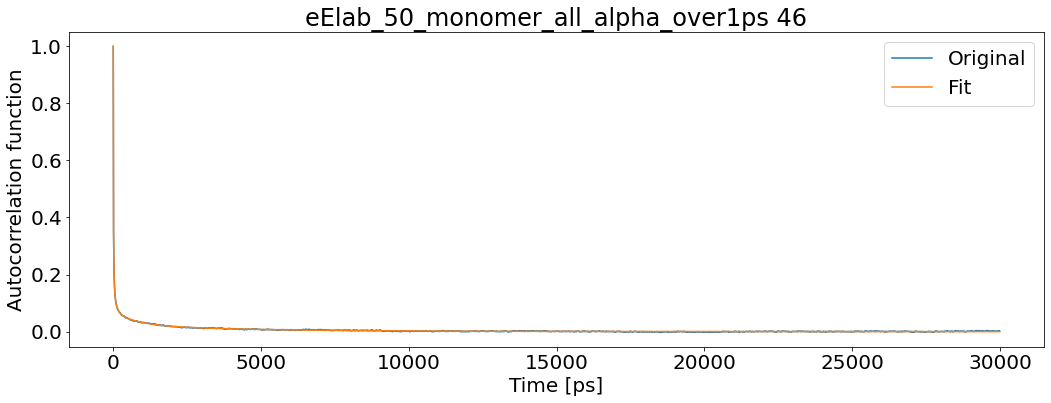

T1: 4.435962864724054 T2: 2.407435931138237 NOE: -1.0092485356919703


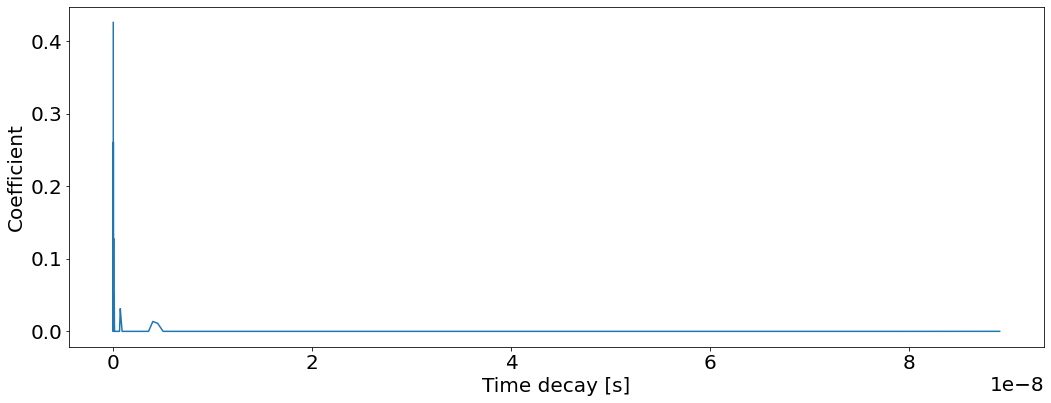

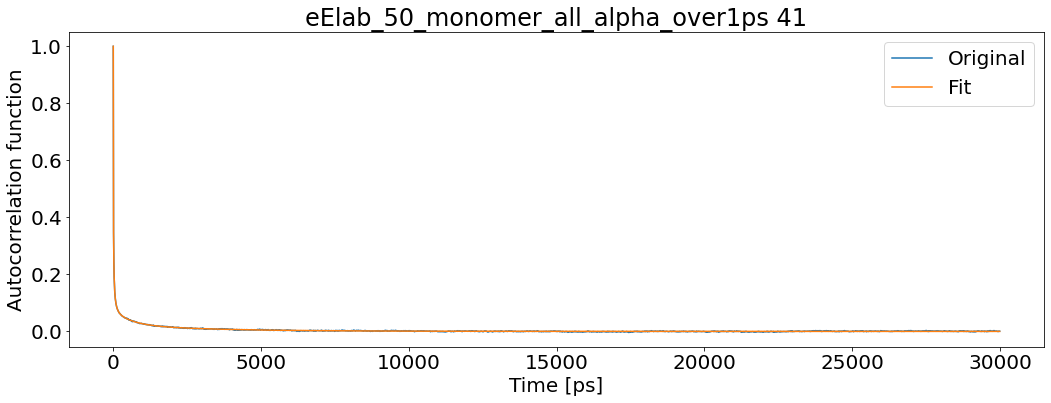

T1: 4.426718069367653 T2: 2.8455213270975435 NOE: -1.0709080427149043


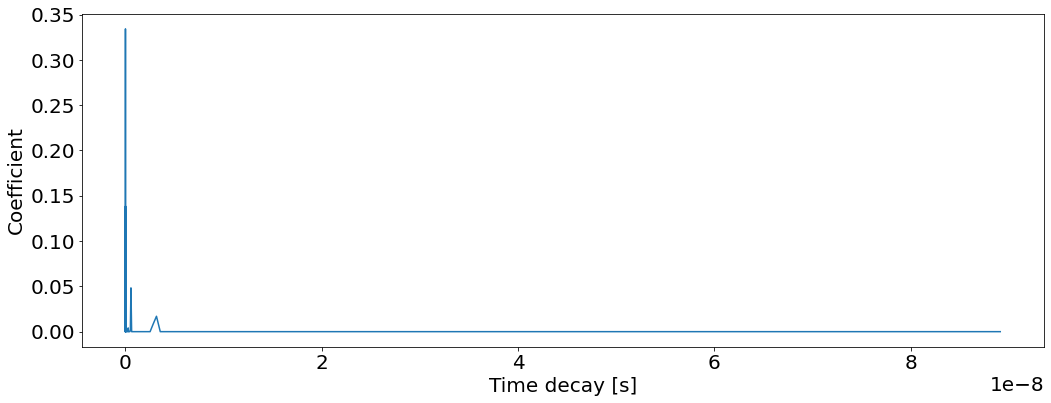

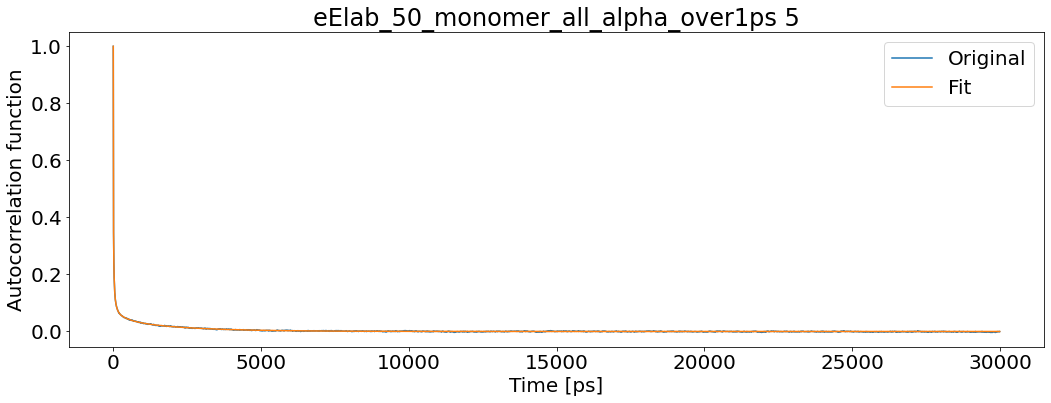

T1: 4.243959270200233 T2: 2.823983067888094 NOE: -0.9258095204409427


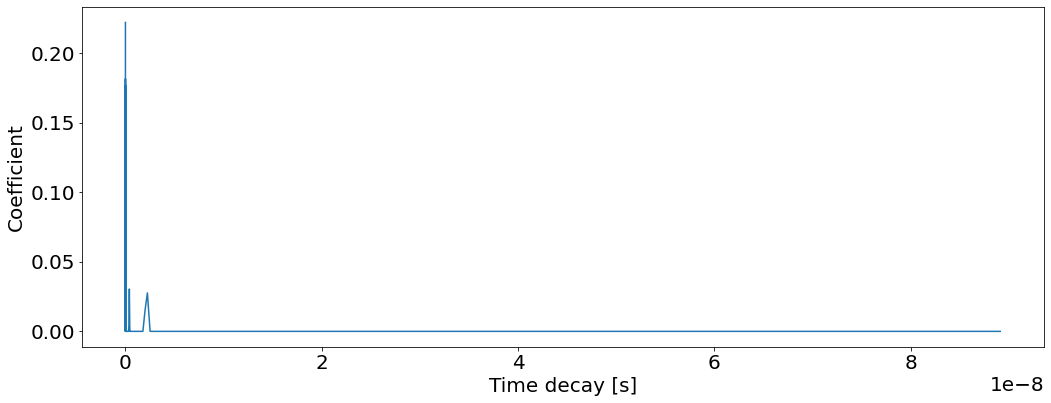

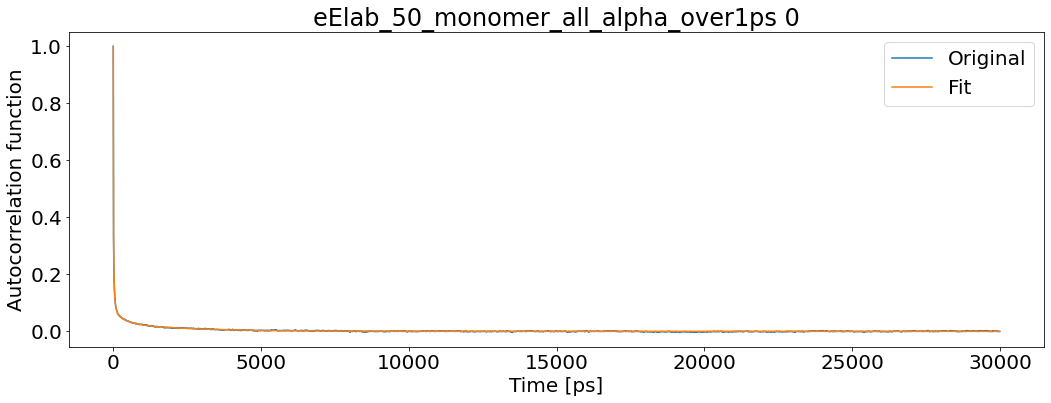

T1: 4.910734454824462 T2: 3.363108778624102 NOE: -1.096647434703423


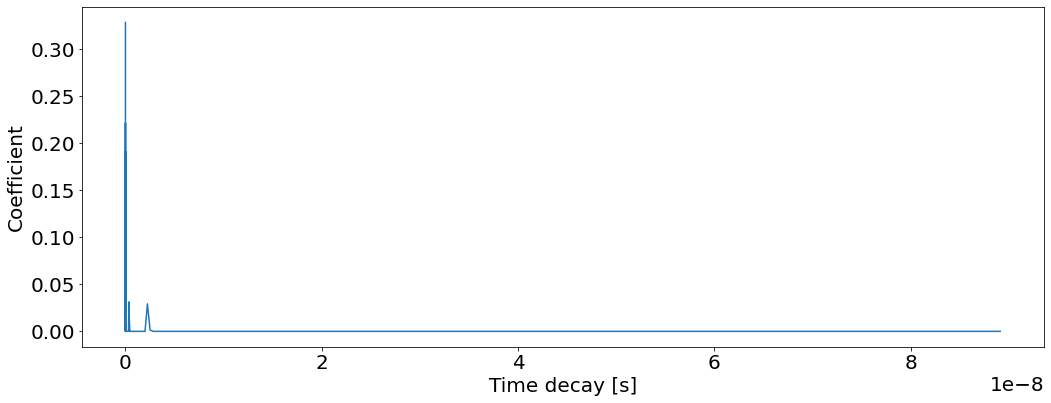

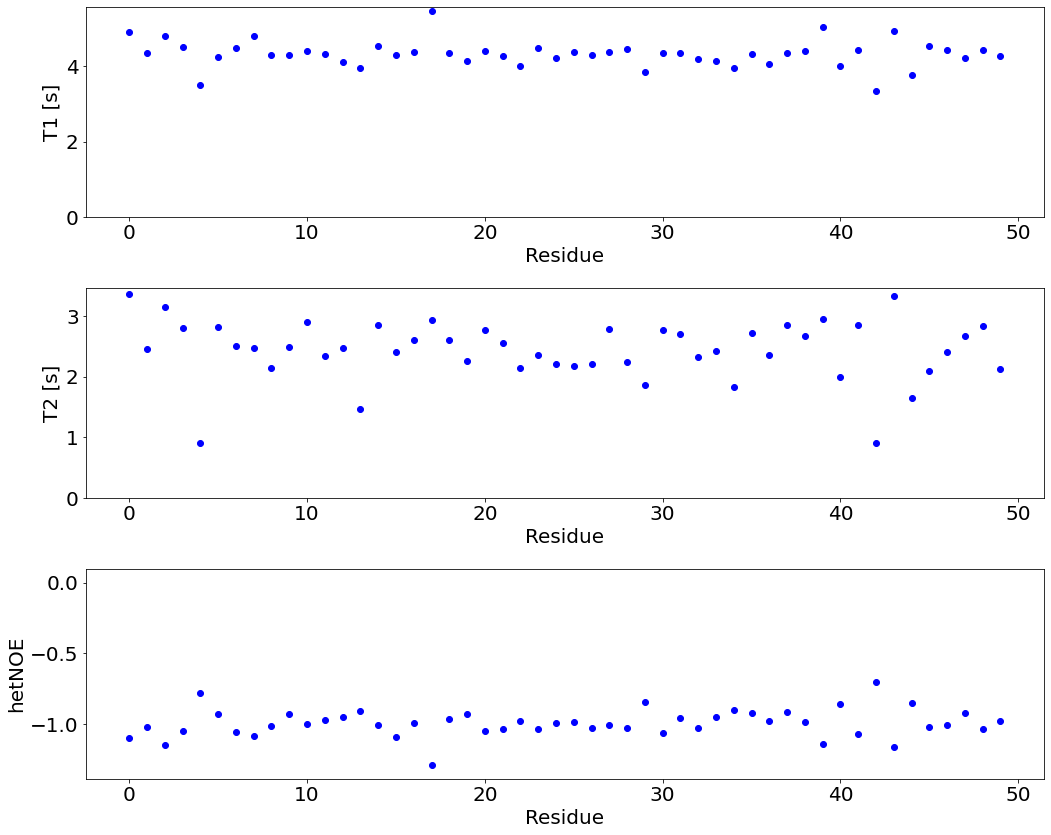

In [15]:
### New analysis, all times over 1 ps

OP=0 # order parameter
smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=100 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/50 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
#magnetic_field=2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
magn_field_MHz=850 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="15N" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen curl

output_path="new_analysis/"
#systems=["eElab_50_dimer_all_alpha","eElab_50_dimer_all_gamma"]
systems=["eElab_50_monomer_all_alpha"]

#relaxations_1ps={}
#relaxations_1ps["class"]={}
#relaxations_1ps["yaml"]={}

for system in systems:
    folder_path="new_analysis/"+system+"/"
    output_name=system+"_over1ps"
    yaml_output=output_path+output_name+".yaml"
    relaxations_1ps["class"][system]=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_name)
    rt.plot_T1_T2_noe(relaxations_1ps["class"][system],yaml_output,"pic.png")
    
    with open(yaml_output) as yaml_file:
        relaxations_1ps["yaml"][system]= yaml.load(yaml_file,Loader=yaml.FullLoader)

(array([ 1.,  0.,  0.,  0.,  0.,  0., 11., 12., 12., 14.]),
 array([-1.2966239 , -1.24866583, -1.20070776, -1.15274968, -1.10479161,
        -1.05683354, -1.00887547, -0.9609174 , -0.91295932, -0.86500125,
        -0.81704318]),
 <a list of 10 Patch objects>)

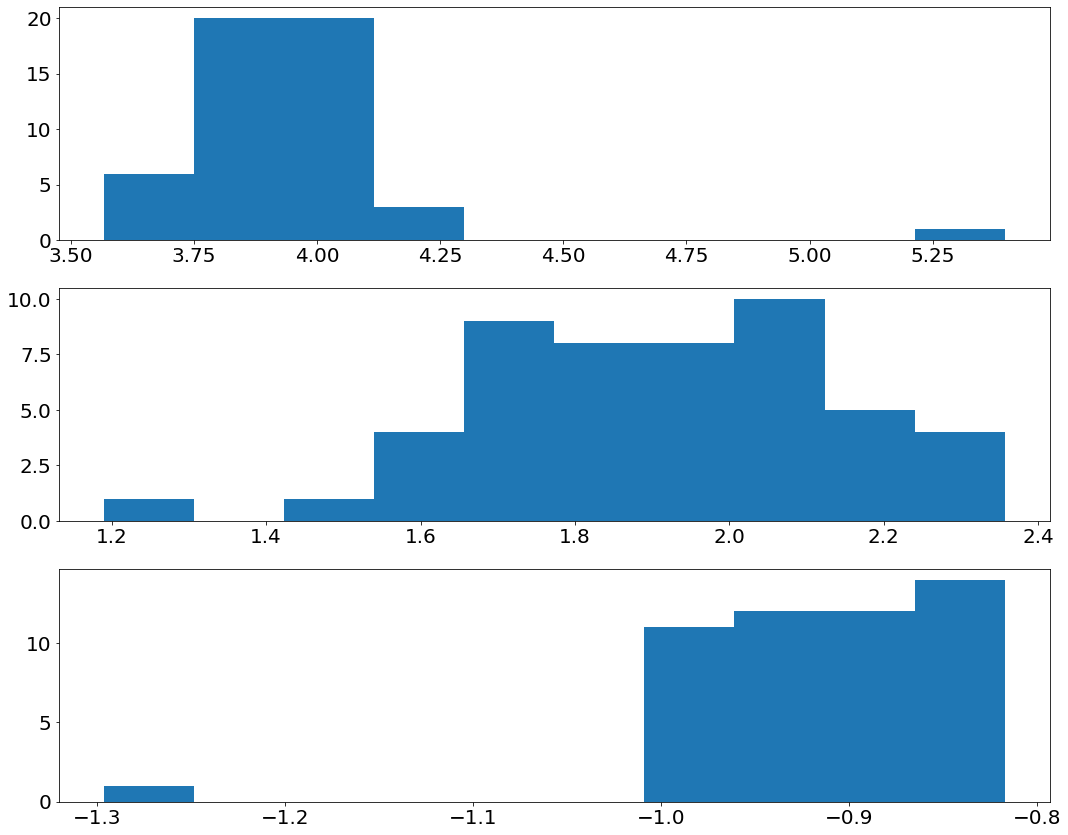

In [12]:
t1=[]
t2=[]
noe=[]

for i in relaxations_1ps["yaml"]["eElab_50_dimer_all_alpha"]:
    t1.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_alpha"][i]["T1"]))
    t2.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_alpha"][i]["T2"]))
    noe.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_alpha"][i]["hetNOE"]))
    

plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.hist(t1)
ax2.hist(t2)
ax3.hist(noe)

(array([ 1.,  0.,  0.,  0.,  5.,  2., 19., 14.,  8.,  1.]),
 array([-1.43538233, -1.38350086, -1.33161939, -1.27973792, -1.22785645,
        -1.17597498, -1.12409351, -1.07221204, -1.02033056, -0.96844909,
        -0.91656762]),
 <a list of 10 Patch objects>)

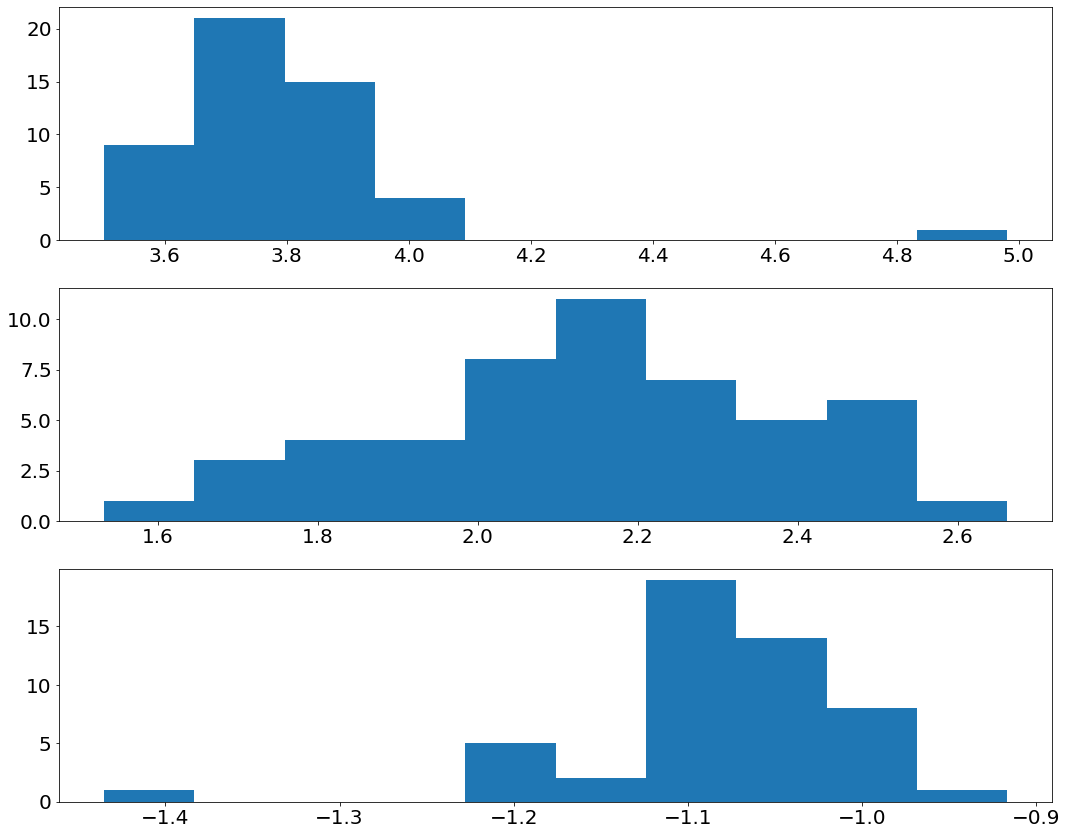

In [14]:
t1=[]
t2=[]
noe=[]

for i in relaxations_1ps["yaml"]["eElab_50_dimer_all_gamma"]:
    t1.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_gamma"][i]["T1"]))
    t2.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_gamma"][i]["T2"]))
    noe.append(float(relaxations_1ps["yaml"]["eElab_50_dimer_all_gamma"][i]["hetNOE"]))
    

plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.hist(t1)
ax2.hist(t2)
ax3.hist(noe)

(array([ 1.,  0.,  3.,  6., 15., 12.,  8.,  3.,  1.,  1.]),
 array([-1.28748772, -1.22908377, -1.17067982, -1.11227587, -1.05387192,
        -0.99546798, -0.93706403, -0.87866008, -0.82025613, -0.76185218,
        -0.70344823]),
 <a list of 10 Patch objects>)

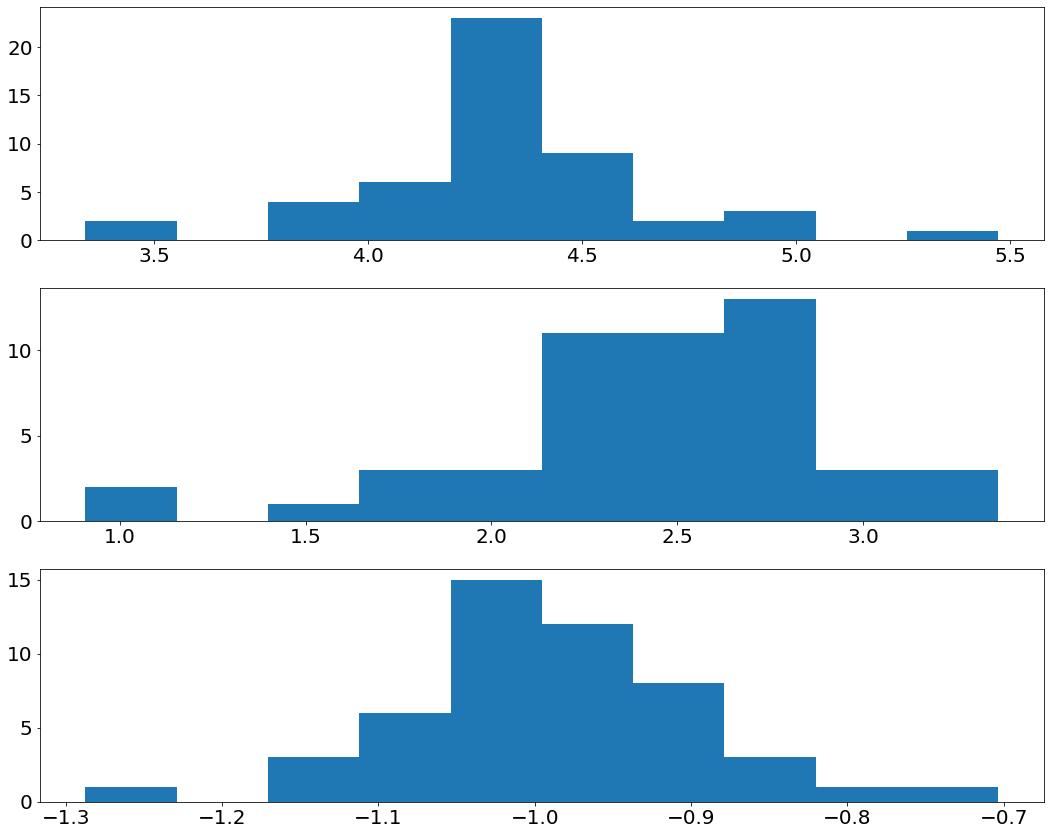

In [16]:
t1=[]
t2=[]
noe=[]

for i in relaxations_1ps["yaml"]["eElab_50_monomer_all_alpha"]:
    t1.append(float(relaxations_1ps["yaml"]["eElab_50_monomer_all_alpha"][i]["T1"]))
    t2.append(float(relaxations_1ps["yaml"]["eElab_50_monomer_all_alpha"][i]["T2"]))
    noe.append(float(relaxations_1ps["yaml"]["eElab_50_monomer_all_alpha"][i]["hetNOE"]))
    

plt.rcParams["figure.figsize"] = [15.00, 12]
plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.hist(t1)
ax2.hist(t2)
ax3.hist(noe)

In [1]:
pwd

'/home/ricky/Documents/from_work/git/CorysPeptides/calculate_relax_from_SDS_proteins'

In [3]:
output_path_relax="../../CorysPeptides/relax_times_yamls/SDS/average_over_SDS/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../CorysPeptides/timescales_yamls/SDS/average_over_SDS/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:

   * GWALP_dimer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * GWALP_monomer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * GWALP_dimer_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_m

In [3]:
mf.what_analysis_done(timescales_yamls["empty_60SDS_100fsSF_replica1"])

nuclei : 2H , analyzed in:  ['analysis0', 'analysis1', 'analysis2', 'analysis3', 'analysis4', 'analysis5', 'analysis6', 'analysis7', 'analysis8']
*
magnetic_field_[T] : 2.35 , analyzed in:  ['analysis0', 'analysis3', 'analysis6']
magnetic_field_[T] : 5.99 , analyzed in:  ['analysis1', 'analysis4', 'analysis7']
magnetic_field_[T] : 8.49 , analyzed in:  ['analysis2', 'analysis5', 'analysis8']
*
magnetic_field_[MHz] : 100.05 , analyzed in:  ['analysis0', 'analysis3', 'analysis6']
magnetic_field_[MHz] : 255.03 , analyzed in:  ['analysis1', 'analysis4', 'analysis7']
magnetic_field_[MHz] : 361.47 , analyzed in:  ['analysis2', 'analysis5', 'analysis8']
*
N_exp_to_fit : 100 , analyzed in:  ['analysis0', 'analysis1', 'analysis2', 'analysis3', 'analysis4', 'analysis5', 'analysis6', 'analysis7', 'analysis8']
*
smallest_corr_time_[s] : 1e-13 , analyzed in:  ['analysis0', 'analysis1', 'analysis2']
smallest_corr_time_[s] : 1e-14 , analyzed in:  ['analysis3', 'analysis4', 'analysis5', 'analysis6', 'a

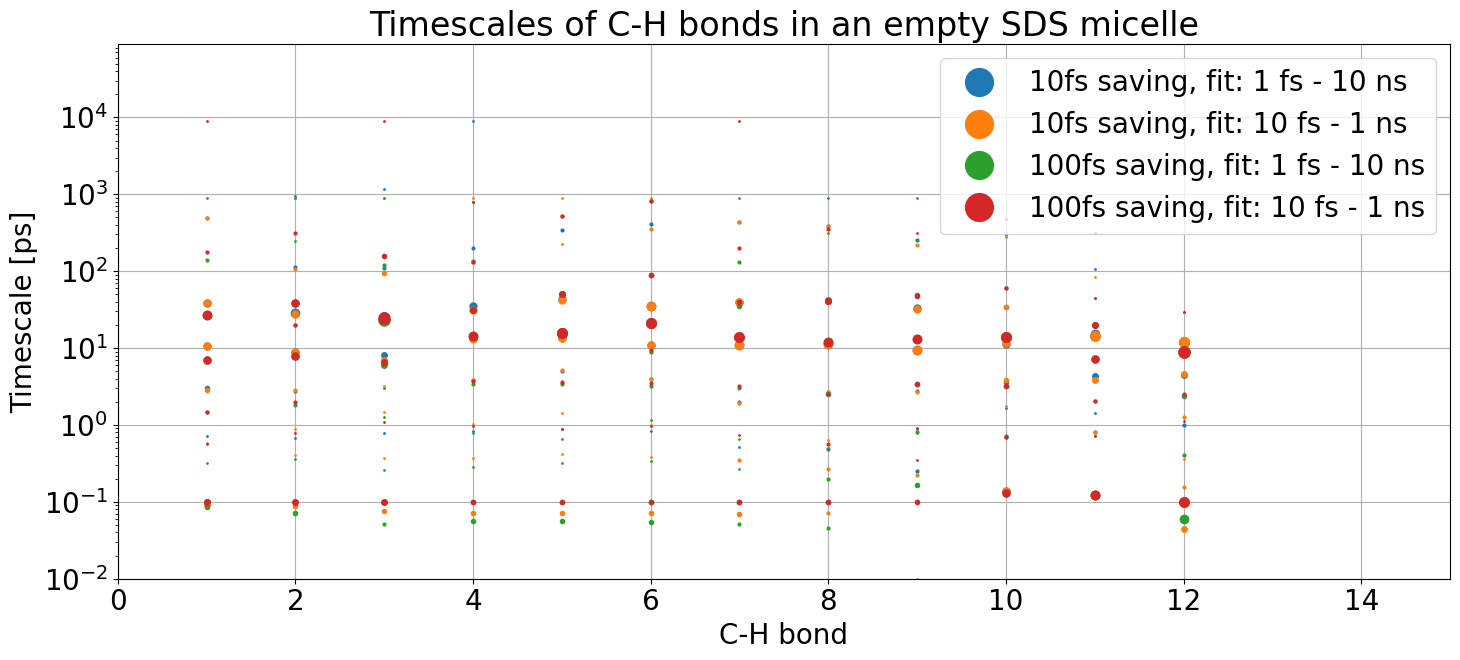

In [4]:
merge=5 # number of consequent points to be merged (works on log scale!!)
ylim=[0,10**(-8)*1] # useful for observing details
ylim=None # if None the whole range of available data is plotted
title="Timescales of C-H bonds in an empty SDS micelle"
xlabel="C-H bond"
plot_output="time_scales_empty_micelle_log.pdf"
yscale="log" #log/lin  logarithim/linear scale
units=10**12 # 1- seconds, 10**3 ms, 10**6 us, 10**9 ns ...
shift=0 # shift points for different systems in x-axis, multiplies of 0.15

aminoAcidsReplicas=[]
for system in timescales_yamls:
    #print(system)
    aminoAcidsReplicas.append(timescales_yamls[system]["analysis3"])


labels=["10fs saving, fit: 1 fs - 10 ns","10fs saving, fit: 10 fs - 1 ns","100fs saving, fit: 1 fs - 10 ns","100fs saving, fit: 10 fs - 1 ns"] #must have same dimention as aminoAcids
aminoAcids=[timescales_yamls["empty_60SDS_10fsSF_replica1_81A"]["analysis0"],
            timescales_yamls["empty_60SDS_10fsSF_replica1_81A"]["analysis3"],
            timescales_yamls["empty_60SDS_100fsSF_replica1"]["analysis6"],
            timescales_yamls["empty_60SDS_100fsSF_replica1"]["analysis0"]]

pt.PlotTimescales_replicas2(merge,shift,title,xlabel,ylim,yscale,units,labels,plot_output,*aminoAcids)